In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import psycopg2 # драйвер для postgresql
import getpass  # прячем пароль, чтобы не писать его в параметрах

conn=psycopg2.connect(user='postgres',
                      database='postgres',
                      host='localhost',
                      port='5432',
                      password=getpass.getpass('Insert password: ')
                        )
print(conn.get_dsn_parameters())

Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [4]:
# Запрос кодов бумаг
import pandas as pd
query_sec="SELECT DISTINCT \"SECCODE\" FROM order_log20150303 ORDER BY \"SECCODE\" ASC"
securities=pd.read_sql_query(query_sec,conn)
securities[50:70].head()

,SECCODE
50,FXDE
51,FXGD
52,FXIT
53,FXJP
54,FXMM


In [9]:
# Получение данных из базы
import pandas as pd
query = "SELECT * FROM order_log20150303 WHERE \"TIME\" <= 184000000 AND \"SECCODE\" = 'ALRS';"
data = pd.read_sql_query(query,conn)
data.head(10)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
0,2,ALRS,S,100000000,2,1,78.00,1100,NaN,NaN
1,250,ALRS,B,100000000,250,1,67.57,100,NaN,NaN
2,268,ALRS,B,100000000,268,1,67.57,100,NaN,NaN
3,292,ALRS,B,100000000,292,1,67.57,100,NaN,NaN
4,311,ALRS,B,100000000,311,1,67.57,200,NaN,NaN
5,346,ALRS,B,100000000,346,1,67.57,100,NaN,NaN
6,416,ALRS,B,100000000,416,1,67.57,100,NaN,NaN
7,435,ALRS,B,100000000,435,1,67.57,100,NaN,NaN
8,453,ALRS,B,100000000,453,1,67.57,100,NaN,NaN
9,477,ALRS,B,100000000,477,1,67.57,200,NaN,NaN


In [10]:
#Сортировка по цене в убывающем порядке
data.sort_values(by=['PRICE'], ascending = False)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
113368,3601238,ALRS,S,110153948,927779,0,82.00,600,NaN,NaN
86190,1865233,ALRS,S,102407417,927779,1,82.00,600,NaN,NaN
32,1455,ALRS,S,100000000,1455,1,81.64,600,NaN,NaN
412579,19502430,ALRS,S,174127685,1455,0,81.64,600,NaN,NaN
260738,10095426,ALRS,S,124305467,4441789,0,80.00,2000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
255446,10017703,ALRS,B,124139150,4904821,2,0.00,500,2.460834e+09,72.17
277788,11342389,ALRS,S,130138716,5548448,1,0.00,100,NaN,NaN
277805,11342391,ALRS,S,130138716,5548448,2,0.00,100,2.460873e+09,72.21
277819,11343666,ALRS,S,130140212,5549083,1,0.00,300,NaN,NaN


In [11]:
data.pivot_table(index = 'PRICE', columns = 'BUYSELL', values = 'VOLUME', aggfunc = 'sum').sort_values(by=['PRICE'], ascending = False)

BUYSELL,B,S
PRICE,,
82.00,NaN,1200.0
81.64,NaN,1200.0
80.00,NaN,18000.0
79.99,NaN,22000.0
79.97,NaN,800.0
...,...,...
60.61,64800.0,NaN
60.60,30000.0,NaN
60.08,16200.0,NaN


In [12]:
#Поиск значений, где цена =0 (рыночные заявки)
data[data['PRICE']==0.0]

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
234,14310,ALRS,B,100001122,13580,1,0.0,500,NaN,NaN
235,14311,ALRS,B,100001122,13580,2,0.0,500,2.460563e+09,68.91
241,14906,ALRS,S,100001489,13908,1,0.0,100,NaN,NaN
243,14908,ALRS,S,100001489,13908,2,0.0,100,2.460563e+09,68.41
787,74593,ALRS,S,100021475,43256,1,0.0,100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
430393,21705980,ALRS,B,183917736,10607691,1,0.0,500,NaN,NaN
430394,21705981,ALRS,B,183917736,10607691,2,0.0,500,2.461148e+09,72.18
431090,21719523,ALRS,B,183936904,10614060,1,0.0,1500,NaN,NaN
431091,21719524,ALRS,B,183936904,10614060,2,0.0,800,2.461148e+09,72.18


In [13]:
# Построение книги лимитированных заявок (LOB - Limit Order Book)

# Устанавливаем маску лимитных заявок заявках (цена не равна 0)
no_mrk_ind=data['PRICE']!=0
#  Таблица выставленных заявок при условии, что цена не равна 0
plc=data[['ORDERNO','BUYSELL','PRICE','VOLUME']][(data['ACTION']==1) & no_mrk_ind]
# Таблица отозванных заявок при условии, что цена не равна 0
wdr=data[['ORDERNO','VOLUME']][(data['ACTION']==0) & no_mrk_ind]
# Таблица исполненных объемов
trds=data[['ORDERNO','VOLUME']][(data['ACTION']==2) & no_mrk_ind] 
trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
trds['ORDERNO']=trds.index
trds.index=range(trds.shape[0])

# Книга (aka стакан, aka LOB)
lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
lob=pd.merge(lob,trds, on='ORDERNO', how='left')
lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
lob=lob.fillna(0)
lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
lob=lob[lob['TOTAL_VOL']>0]
lob 

,ORDERNO,BUYSELL,PRICE,VOLUME_plc,VOLUME_wdr,VOLUME_trds,TOTAL_VOL
17651,465710,S,74.00,700,0.0,0.0,700.0
47092,1298221,B,69.25,14000,0.0,1700.0,12300.0
71076,2833044,B,69.80,5000,0.0,0.0,5000.0
76421,3011273,S,72.44,1500,0.0,1100.0,400.0
105577,4192516,S,72.48,100,0.0,0.0,100.0
115791,4603720,S,73.00,10000,0.0,0.0,10000.0
135181,5315191,S,72.99,1900,0.0,0.0,1900.0
164222,6858969,B,69.70,100,0.0,0.0,100.0
170600,7173431,S,73.45,100,0.0,0.0,100.0
188858,8093839,B,71.90,100,0.0,0.0,100.0


In [14]:
#Поиск 90-персентиля 
import numpy as np

tr = lob['TOTAL_VOL']
per_tr_90 = np.percentile(tr, 90)
print('90%-percentile:', per_tr_90)

90%-percentile: 5000.0


In [15]:
#Cтакан заявок
lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
lob.sort_index(axis=0,inplace=True, ascending=False)
lob=lob.fillna(0)
lob.head(100)

BUYSELL,B,S
PRICE,,
74.00,0.0,700.0
73.94,0.0,5000.0
73.48,0.0,400.0
73.45,0.0,100.0
73.00,0.0,10000.0
72.99,0.0,1900.0
72.48,0.0,100.0
72.47,0.0,2000.0
72.45,0.0,100.0


In [16]:
import numpy as np
bid = lob[lob['B']>0].index[0:10]
ask = lob[lob['S']>0].index[-10:]
ask.append(bid)
best_lob=lob.loc[ask.append(bid)]
best_lob1 = pd.DataFrame(best_lob).reset_index().rename_axis(None, axis=1)
best_lob1

,PRICE,B,S
0,73.45,0.0,100.0
1,73.00,0.0,10000.0
2,72.99,0.0,1900.0
3,72.48,0.0,100.0
4,72.47,0.0,2000.0
5,72.45,0.0,100.0
6,72.44,0.0,400.0
7,72.40,0.0,2000.0
8,72.19,0.0,300.0
9,72.18,0.0,6100.0


In [17]:
#Расчет, как сдвинется цена Sell, если исполнится объем равный 3650 (Price impact on the Sell side)
import pandas as pd

df2 = best_lob1.copy()
print(df2)
df = df2.loc[df2.S != 0.0, :][::-1]
print(df)

res = 0
s = []
#Если сумма накопленных объемов больше 3650, то от 3650 отнимаем сумму предыдущих объемов, находим дельту и умножаем ее на цену последней заявки
for i in df.index:
	if res > 3650:
		delta = 3650 - (res - df.loc[i+1, 'S'])
		print(delta)
		p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*delta)/3650
		break
#Если сумма накопленных объемов равна 3650, то цены умножаем на объемы и делим на исполненный объем
	elif res == 3650:
		p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*df.loc[i+1, 'S'])/3650
		break
	else:
		res += df.loc[i, 'S']
		print(res)
		s.append(df.loc[i, 'S'] * df.loc[i, 'PRICE'])
		print(s)
ask_impact = p
print('Price impact:',ask_impact)
print(delta)

    PRICE       B        S
0   73.45     0.0    100.0
1   73.00     0.0  10000.0
2   72.99     0.0   1900.0
3   72.48     0.0    100.0
4   72.47     0.0   2000.0
5   72.45     0.0    100.0
6   72.44     0.0    400.0
7   72.40     0.0   2000.0
8   72.19     0.0    300.0
9   72.18     0.0   6100.0
10  72.16  2300.0      0.0
11  72.15  1500.0      0.0
12  72.10   600.0      0.0
13  72.09  2000.0      0.0
14  72.06  5000.0      0.0
15  72.05  1900.0      0.0
16  72.00  2600.0      0.0
17  71.90   100.0      0.0
18  71.80   600.0      0.0
19  71.55  1000.0      0.0
   PRICE    B        S
9  72.18  0.0   6100.0
8  72.19  0.0    300.0
7  72.40  0.0   2000.0
6  72.44  0.0    400.0
5  72.45  0.0    100.0
4  72.47  0.0   2000.0
3  72.48  0.0    100.0
2  72.99  0.0   1900.0
1  73.00  0.0  10000.0
0  73.45  0.0    100.0
6100.0
[440298.00000000006]
3650.0
Price impact: 72.18
3650.0


In [18]:
#Расчет, как сдвинется цена Buy, если исполнится объем равный 3650 (Price impact on the Buy side)
import pandas as pd

df2 = best_lob1.copy()
print(df2)
df = df2.loc[df2.B != 0.0, :]
print(df)

res = 0
s = []

for i in df.index:
	if res > 3650:       
		delta = 3650 - (res - df.loc[i-1, 'B'])
		#print(delta)
		p = (sum(s[:-1]) + df.loc[i-1, 'PRICE']*delta)/3650
		#print(p)
		break
	elif res == 3650:
		p = (sum(s[:-1]) + df.loc[i-1, 'PRICE']*df.loc[i-1, 'B'])/3650
		#print(p)
		break
	else:
		res += df.loc[i, 'B']
		#print(res)
		s.append(df.loc[i, 'B'] * df.loc[i, 'PRICE'])
		#print(s)
bid_impact = p
print('Price impact:',bid_impact)

    PRICE       B        S
0   73.45     0.0    100.0
1   73.00     0.0  10000.0
2   72.99     0.0   1900.0
3   72.48     0.0    100.0
4   72.47     0.0   2000.0
5   72.45     0.0    100.0
6   72.44     0.0    400.0
7   72.40     0.0   2000.0
8   72.19     0.0    300.0
9   72.18     0.0   6100.0
10  72.16  2300.0      0.0
11  72.15  1500.0      0.0
12  72.10   600.0      0.0
13  72.09  2000.0      0.0
14  72.06  5000.0      0.0
15  72.05  1900.0      0.0
16  72.00  2600.0      0.0
17  71.90   100.0      0.0
18  71.80   600.0      0.0
19  71.55  1000.0      0.0
    PRICE       B    S
10  72.16  2300.0  0.0
11  72.15  1500.0  0.0
12  72.10   600.0  0.0
13  72.09  2000.0  0.0
14  72.06  5000.0  0.0
15  72.05  1900.0  0.0
16  72.00  2600.0  0.0
17  71.90   100.0  0.0
18  71.80   600.0  0.0
19  71.55  1000.0  0.0
Price impact: 72.15630136986302


In [19]:
best_lob=lob.loc[ask.append(bid)]
best_bid=max(lob[lob['B']>0].index)
best_ask=min(lob[lob['S']>0].index)
print(best_ask, best_bid)

72.18 72.16


In [20]:
#Бид и аск котируемый объем вне зависимости от цены
import numpy as np
ask_quoted_volume = best_lob['S'].sum()
bid_quoted_volume = best_lob['B'].sum()
av_quoted_volume = (ask_quoted_volume+bid_quoted_volume)/2
print(ask_quoted_volume,bid_quoted_volume,av_quoted_volume)

23000.0 17600.0 20300.0


Bid-ask spread: -0.020000000000010232


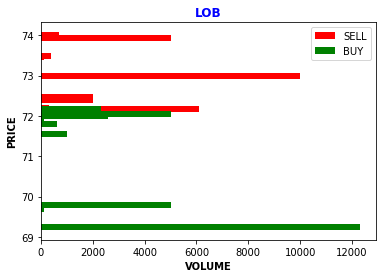

In [21]:
#Визуализация стакана лимитированных заявок до заданного момента времени
import matplotlib.pyplot as plt

font = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 12,
        }

fig, ax = plt.subplots()
plt.title('LOB',loc='center',fontdict =font)
x = lob.index
y1 = lob['S']
y2 = lob['B']
plt.barh(x,y1,height = 0.15, label = 'SELL', color = 'r')
plt.barh(x,y2,height = 0.15, label = 'BUY', color = 'g')
plt.xlabel('VOLUME',weight= 'bold',size = 10)
plt.ylabel('PRICE',weight= 'bold',size = 10)
best_bid = max(lob[lob['B']>0].index)
best_ask = min(lob[lob['S']>0].index)
bid_ask_spread=best_bid-best_ask
print('Bid-ask spread:', bid_ask_spread)
plt.legend()
plt.show()

In [33]:
import pandas as pd
import numpy as np

def calc(sec, time_s, time_e, step, typE, conn):
    
    # time_s = левая часть интервала времени (HHMMSSZZZ)
    # time_e = правая часть интервала (HHMMSSZZZ)
    # step = длительность шага (т.е. для пятиминутного шага step = 5)
    # typE = единица измерения шага ('h', 'm', 's' или любое другое обозначение для миллисекунд)
    # sec = код бумаги в формате '\'CODE\''
    # conn = connection
    
    query="SELECT * FROM order_log20150303 WHERE \"TIME\"<="+str(time_e)+" AND \"SECCODE\"="+sec
    orders=pd.read_sql_query(query,conn)
        
    # Переводим начальное время в миллисекунды
    dts = str(time_s)
    h,m,s,z = int(dts[:2]),int(dts[2:4]),int(dts[4:6]),int(dts[6:])
    tsm = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим конечное время в миллисекунды
    dte = str(time_e)
    h,m,s,z = int(dte[:2]),int(dte[2:4]),int(dte[4:6]),int(dte[6:])
    tem = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим шаг в миллисекунды
    if typE == 'h':
        step = step * 3600000
    elif typE == 'm':
        step = step * 60000
    elif typE == 's':
        step = step * 1000

    times = []
    
    while tsm < tem:
        
        # Разбиваем время на отдельные часы, минуты, секунды и миллисекунды
        ha = tsm // 3600000
        ma = (tsm % 3600000) // 60000
        sa = (tsm % 60000) // 1000
        za = tsm % 1000
        
        # Переводим текущее время в "привычный формат"; добавляем его в список
        tmp = ha * 10000000 + ma * 100000 + sa * 1000 + za
        times.append(tmp)
        
        tsm = tsm + step;
    
    # Добавляем конечное время в список
    times.append(time_e)
    # Создаем пустой датафрейм
    
    results = pd.DataFrame(columns=['SECCODE','TIME','ASK_IMPACT','BID_IMPACT','MID_PRICE','BA_SPREAD','BEST_B_VOL','BEST_S_VOL','M_imbalance','Bid_quoted_volume','Ask_quoted_volume','Quoted_spread','Av_quoted_volume','Best_bid','Best_ask','Total_volume'])
    
    # Далее идет функция расчета показателей
    MID_PRICE = []
    BID_IMPACT = []
    ASK_IMPACT = []
    BA_SPREAD = []
    BEST_B_VOL = []
    BEST_S_VOL = []
    M_imbalance = []
    Bid_quoted_volume = []
    Ask_quoted_volume = []
    Quoted_spread = []
    Av_quoted_volume= []
    Best_bid = []
    Best_ask = []
    Total_volume = []
             
    for i in times:
        
        orders_i = orders[orders['TIME']<=i]
        
    # Устанавливаем маску лимитных заявок
        no_mrk_ind=orders_i['PRICE']!=0

    # Таблица выставленных заявок
        plc=orders_i[['ORDERNO','BUYSELL','PRICE','VOLUME']][(orders_i['ACTION']==1) & no_mrk_ind]

    # Таблица отозванных заявок
        wdr=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==0) & no_mrk_ind]
    
    # Таблица исполненных объемов
        trds=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==2) & no_mrk_ind] 
        trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
        trds['ORDERNO']=trds.index
        trds.index=range(trds.shape[0])

    # Книга (aka стакан, aka LOB)
        lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
        lob=pd.merge(lob,trds, on='ORDERNO', how='left')
        lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
        lob=lob.fillna(0)
        lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
        lob=lob[lob['TOTAL_VOL']>0]
        
        #Поиск общего объема на каждом из интервалов
        total_volume = (lob['TOTAL_VOL']).sum()
        Total_volume.append(total_volume)
        
        #Построение стакана       
        lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
        lob.sort_index(axis=0,inplace=True, ascending=False)
        lob=lob.fillna(0)
        
        bid = lob[lob['B']>0].index[0:10]
        ask = lob[lob['S']>0].index[-10:]
        ask.append(bid)
        best_lob=lob.loc[ask.append(bid)]
        
        best_lob = pd.DataFrame(best_lob).reset_index().rename_axis(None, axis=1)
        
        #Расчет, как сдвинется цена Sell, если исполнится объем 5000(Price impact on the Sell side)
        df2 = best_lob.copy()
        df = df2.loc[df2.S != 0.0, :][::-1]
          
        
        res = 0
        s = []
        for i in df.index:
            if res > 5000:
                delta = 5000 - (res - df.loc[i+1, 'S'])
                p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*delta)/5000
                break
            elif res ==5000:
                p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*df.loc[i+1, 'S'])/5000
                break
            else:
                res += df.loc[i, 'S']
                s.append(df.loc[i, 'S'] * df.loc[i, 'PRICE'])
        
        print('ask_impact',p)
        ASK_IMPACT.append(p) 
        
        #Расчет, как сдвинется цена Bid,если исполнится объем 3650
        df3 = best_lob.copy()
        df = df3.loc[df3.B != 0.0, :]
          
        
        res = 0
        s = []
        for i in df.index:
            if res > 5000:
                delta = 5000 - (res - df.loc[i-1, 'B'])
                p = (sum(s[:-1]) + df.loc[i-1, 'PRICE']*delta)/5000
                break
            elif res == 5000:
                p = (sum(s[:-1]) + df.loc[i-1, 'PRICE']*df.loc[i-1, 'B'])/5000
                break
            else:
                res += df.loc[i, 'B']
                s.append(df.loc[i, 'B'] * df.loc[i, 'PRICE'])
        print('bid_impact',p)
        BID_IMPACT.append(p)
        
        #Нахождение лучшей цены bid и ask
    
        best_bid=max(lob[lob['B']>0].index)
        best_ask=min(lob[lob['S']>0].index)
        Best_bid.append(best_bid)
        Best_ask.append(best_ask)
        
        #Расчет показателей ценовой динамики и ликвидности, вычисляемые на основе книги лимитированных заявок
         
        mid_price=(best_bid+best_ask)/2
        MID_PRICE.append(mid_price)
        
        #Переведем в базисные пункты для расчетов PCA bid_ask spread

        bid_ask_spread=(best_ask-best_bid)*10000
        BA_SPREAD.append(bid_ask_spread)
        
        best_B_vol = lob['B'].loc[best_bid]
        BEST_B_VOL.append(best_B_vol)
        
        best_S_vol = lob['S'].loc[best_ask]
        BEST_S_VOL.append(best_S_vol)
        
        market_imbalance = (best_B_vol-best_S_vol)/ (best_B_vol+best_S_vol)
        M_imbalance.append(market_imbalance)
        
        bid_quoted_volume = (lob['B']).sum()
        Bid_quoted_volume.append(bid_quoted_volume)   
        
        ask_quoted_volume = (lob['S']).sum()
        Ask_quoted_volume.append(ask_quoted_volume)
        
        quoted_spread = ((best_ask-best_bid)/mid_price)*100
        Quoted_spread.append(quoted_spread)
        
        av_quoted_volume =(bid_quoted_volume+ask_quoted_volume)/2
        Av_quoted_volume.append(av_quoted_volume)
        
                                     
    results = pd.DataFrame({'SECCODE':sec, 'TIME': times,'ASK_IMPACT':ASK_IMPACT,'BID_IMPACT':BID_IMPACT,'MID_PRICE': MID_PRICE,'BA_SPREAD':BA_SPREAD,'BEST_B_VOL':BEST_B_VOL,'BEST_S_VOL':BEST_S_VOL, 'M_imbalance':M_imbalance,'Bid_quoted_volume':Bid_quoted_volume, 'Ask_quoted_volume':Ask_quoted_volume, 'Quoted_spread':Quoted_spread,'Av_quoted_volume':Av_quoted_volume,'Best_bid':best_bid,'Best_ask':best_ask,'Total_volume':Total_volume})    
    results['MID_PRICE'] = MID_PRICE
    results['ASK_IMPACT']=ASK_IMPACT
    results['BID_IMPACT']=BID_IMPACT
    results['BA_SPREAD'] = BA_SPREAD
    results['BEST_B_VOL'] = BEST_B_VOL
    results['BEST_S_VOL'] = BEST_S_VOL
    results['M_imbalance'] = M_imbalance
    results['TIME']= times
    results['Bid_quoted_volume']= Bid_quoted_volume
    results['Ask_quoted_volume']=Ask_quoted_volume
    results['Quoted_spread']=Quoted_spread
    results['Av_quoted_volume']=Av_quoted_volume
    results['Best_bid']=Best_bid
    results['Best_ask']=Best_ask
    results['Total_volume']=Total_volume
    
    
    return results   

In [34]:
#Расчет метрик ликвидности за торговый день(Торговый период с 10:00:00 до 18:39:59, с 18:40:01 до 18:50:00 - аукцион
#закрытия. Дневная клиринговая сессия с 14:00 до 14:05. Вечерний клиринг - с 18:45 до 19:00. Таким образом, выбираем период до 18:40. 
x=calc('\'ALRS\'', 100000000, 184000000, 1, 'm', conn)
x[['SECCODE','TIME','MID_PRICE','BA_SPREAD','BEST_B_VOL','BEST_S_VOL','M_imbalance','Quoted_spread','Av_quoted_volume','Best_bid','Best_ask','Total_volume']]

ask_impact 69.3964
bid_impact 69.3964
ask_impact 68.9698
bid_impact 68.5858
ask_impact 68.8984
bid_impact 68.6696
ask_impact 68.7394
bid_impact 68.6046
ask_impact 68.7332
bid_impact 68.6018
ask_impact 68.7672
bid_impact 68.615
ask_impact 68.78
bid_impact 68.6194
ask_impact 68.8706
bid_impact 68.7078
ask_impact 68.9014
bid_impact 68.7374
ask_impact 69.0814
bid_impact 68.8512
ask_impact 69.0074
bid_impact 68.7966
ask_impact 68.9352
bid_impact 68.7406
ask_impact 69.0044
bid_impact 68.824
ask_impact 68.8936
bid_impact 68.7474
ask_impact 68.93440000000001
bid_impact 68.7712
ask_impact 69.1128
bid_impact 68.9142
ask_impact 69.0506
bid_impact 68.9082
ask_impact 69.0328
bid_impact 68.8846
ask_impact 69.1546
bid_impact 69.0318
ask_impact 69.1588
bid_impact 69.0422
ask_impact 69.1338
bid_impact 69.0354
ask_impact 69.144
bid_impact 69.0332
ask_impact 69.218
bid_impact 69.0532
ask_impact 69.2124
bid_impact 69.1014
ask_impact 69.2144
bid_impact 69.098
ask_impact 69.158
bid_impact 69.0306
ask_impact

,SECCODE,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
0,'ALRS',100000000,68.670,5400.0,200.0,600.0,-0.500000,0.786370,212800.0,68.40,68.94,425600.0
1,'ALRS',100100000,68.740,2200.0,1500.0,100.0,0.875000,0.320047,243150.0,68.63,68.85,486300.0
2,'ALRS',100200000,68.760,1200.0,1200.0,600.0,0.333333,0.174520,254700.0,68.70,68.82,509400.0
3,'ALRS',100300000,68.660,1000.0,2300.0,300.0,0.769231,0.145645,271950.0,68.61,68.71,543900.0
4,'ALRS',100400000,68.650,800.0,900.0,1500.0,-0.250000,0.116533,282800.0,68.61,68.69,565600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
516,'ALRS',183600000,72.170,200.0,5400.0,3900.0,0.161290,0.027712,108350.0,72.16,72.18,216700.0
517,'ALRS',183700000,72.175,100.0,6400.0,2800.0,0.391304,0.013855,107300.0,72.17,72.18,214600.0
518,'ALRS',183800000,72.165,300.0,3200.0,2200.0,0.185185,0.041571,96150.0,72.15,72.18,192300.0
519,'ALRS',183900000,72.175,100.0,2000.0,2000.0,0.000000,0.013855,95250.0,72.17,72.18,190500.0


In [35]:
#Поиск среднего значения ask_impact и bid_impact
x['AV_PRICE_IMPACT'] = x[['ASK_IMPACT', 'BID_IMPACT']].mean(axis=1)
x

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,AV_PRICE_IMPACT
0,'ALRS',100000000,69.3964,69.3964,68.670,5400.0,200.0,600.0,-0.500000,81700.0,343900.0,0.786370,212800.0,68.40,68.94,425600.0,69.3964
1,'ALRS',100100000,68.9698,68.5858,68.740,2200.0,1500.0,100.0,0.875000,93800.0,392500.0,0.320047,243150.0,68.63,68.85,486300.0,68.7778
2,'ALRS',100200000,68.8984,68.6696,68.760,1200.0,1200.0,600.0,0.333333,108600.0,400800.0,0.174520,254700.0,68.70,68.82,509400.0,68.7840
3,'ALRS',100300000,68.7394,68.6046,68.660,1000.0,2300.0,300.0,0.769231,109000.0,434900.0,0.145645,271950.0,68.61,68.71,543900.0,68.6720
4,'ALRS',100400000,68.7332,68.6018,68.650,800.0,900.0,1500.0,-0.250000,134200.0,431400.0,0.116533,282800.0,68.61,68.69,565600.0,68.6675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'ALRS',183600000,72.1822,72.1600,72.170,200.0,5400.0,3900.0,0.161290,161000.0,55700.0,0.027712,108350.0,72.16,72.18,216700.0,72.1711
517,'ALRS',183700000,72.1860,72.1700,72.175,100.0,6400.0,2800.0,0.391304,157300.0,57300.0,0.013855,107300.0,72.17,72.18,214600.0,72.1780
518,'ALRS',183800000,72.1968,72.1432,72.165,300.0,3200.0,2200.0,0.185185,139200.0,53100.0,0.041571,96150.0,72.15,72.18,192300.0,72.1700
519,'ALRS',183900000,72.1892,72.1628,72.175,100.0,2000.0,2000.0,0.000000,141700.0,48800.0,0.013855,95250.0,72.17,72.18,190500.0,72.1760


In [36]:
#Расчет Impact cost ДЛЯ СТОРОНЫ BID: https://tavaga.com/tavagapedia/impact-cost/ в базисных пунктах и добавление колонки в дейтафрейм
import numpy as np
x['IMPACT_COST_BID'] = (x['BID_IMPACT'] - x['MID_PRICE'])/(x['MID_PRICE'])*10000
x

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,AV_PRICE_IMPACT,IMPACT_COST_BID
0,'ALRS',100000000,69.3964,69.3964,68.670,5400.0,200.0,600.0,-0.500000,81700.0,343900.0,0.786370,212800.0,68.40,68.94,425600.0,69.3964,105.781273
1,'ALRS',100100000,68.9698,68.5858,68.740,2200.0,1500.0,100.0,0.875000,93800.0,392500.0,0.320047,243150.0,68.63,68.85,486300.0,68.7778,-22.432354
2,'ALRS',100200000,68.8984,68.6696,68.760,1200.0,1200.0,600.0,0.333333,108600.0,400800.0,0.174520,254700.0,68.70,68.82,509400.0,68.7840,-13.147179
3,'ALRS',100300000,68.7394,68.6046,68.660,1000.0,2300.0,300.0,0.769231,109000.0,434900.0,0.145645,271950.0,68.61,68.71,543900.0,68.6720,-8.068745
4,'ALRS',100400000,68.7332,68.6018,68.650,800.0,900.0,1500.0,-0.250000,134200.0,431400.0,0.116533,282800.0,68.61,68.69,565600.0,68.6675,-7.021122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'ALRS',183600000,72.1822,72.1600,72.170,200.0,5400.0,3900.0,0.161290,161000.0,55700.0,0.027712,108350.0,72.16,72.18,216700.0,72.1711,-1.385617
517,'ALRS',183700000,72.1860,72.1700,72.175,100.0,6400.0,2800.0,0.391304,157300.0,57300.0,0.013855,107300.0,72.17,72.18,214600.0,72.1780,-0.692761
518,'ALRS',183800000,72.1968,72.1432,72.165,300.0,3200.0,2200.0,0.185185,139200.0,53100.0,0.041571,96150.0,72.15,72.18,192300.0,72.1700,-3.020855
519,'ALRS',183900000,72.1892,72.1628,72.175,100.0,2000.0,2000.0,0.000000,141700.0,48800.0,0.013855,95250.0,72.17,72.18,190500.0,72.1760,-1.690336


In [37]:
#Расчет Impact cost ДЛЯ СТОРОНЫ ASK: https://tavaga.com/tavagapedia/impact-cost/ в базисных пунктах и добавление колонки в дейтафрейм
import numpy as np
x['IMPACT_COST_ASK'] = (x['ASK_IMPACT'] - x['MID_PRICE'])/(x['MID_PRICE'])*10000
x

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,AV_PRICE_IMPACT,IMPACT_COST_BID,IMPACT_COST_ASK
0,'ALRS',100000000,69.3964,69.3964,68.670,5400.0,200.0,600.0,-0.500000,81700.0,343900.0,0.786370,212800.0,68.40,68.94,425600.0,69.3964,105.781273,105.781273
1,'ALRS',100100000,68.9698,68.5858,68.740,2200.0,1500.0,100.0,0.875000,93800.0,392500.0,0.320047,243150.0,68.63,68.85,486300.0,68.7778,-22.432354,33.430317
2,'ALRS',100200000,68.8984,68.6696,68.760,1200.0,1200.0,600.0,0.333333,108600.0,400800.0,0.174520,254700.0,68.70,68.82,509400.0,68.7840,-13.147179,20.127981
3,'ALRS',100300000,68.7394,68.6046,68.660,1000.0,2300.0,300.0,0.769231,109000.0,434900.0,0.145645,271950.0,68.61,68.71,543900.0,68.6720,-8.068745,11.564230
4,'ALRS',100400000,68.7332,68.6018,68.650,800.0,900.0,1500.0,-0.250000,134200.0,431400.0,0.116533,282800.0,68.61,68.69,565600.0,68.6675,-7.021122,12.119446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'ALRS',183600000,72.1822,72.1600,72.170,200.0,5400.0,3900.0,0.161290,161000.0,55700.0,0.027712,108350.0,72.16,72.18,216700.0,72.1711,-1.385617,1.690453
517,'ALRS',183700000,72.1860,72.1700,72.175,100.0,6400.0,2800.0,0.391304,157300.0,57300.0,0.013855,107300.0,72.17,72.18,214600.0,72.1780,-0.692761,1.524073
518,'ALRS',183800000,72.1968,72.1432,72.165,300.0,3200.0,2200.0,0.185185,139200.0,53100.0,0.041571,96150.0,72.15,72.18,192300.0,72.1700,-3.020855,4.406568
519,'ALRS',183900000,72.1892,72.1628,72.175,100.0,2000.0,2000.0,0.000000,141700.0,48800.0,0.013855,95250.0,72.17,72.18,190500.0,72.1760,-1.690336,1.967440


In [38]:
#Найдем разность между Impact_cost_bid и Impact_cost_ask и разделим на среднюю цену
x['IMBALANCE_OF_INVERSE_DEPTH']= ((x['IMPACT_COST_BID']-x['IMPACT_COST_ASK'])/x['MID_PRICE'])*10000
x

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,AV_PRICE_IMPACT,IMPACT_COST_BID,IMPACT_COST_ASK,IMBALANCE_OF_INVERSE_DEPTH
0,'ALRS',100000000,69.3964,69.3964,68.670,5400.0,200.0,600.0,-0.500000,81700.0,343900.0,0.786370,212800.0,68.40,68.94,425600.0,69.3964,105.781273,105.781273,0.000000
1,'ALRS',100100000,68.9698,68.5858,68.740,2200.0,1500.0,100.0,0.875000,93800.0,392500.0,0.320047,243150.0,68.63,68.85,486300.0,68.7778,-22.432354,33.430317,-8126.661468
2,'ALRS',100200000,68.8984,68.6696,68.760,1200.0,1200.0,600.0,0.333333,108600.0,400800.0,0.174520,254700.0,68.70,68.82,509400.0,68.7840,-13.147179,20.127981,-4839.319368
3,'ALRS',100300000,68.7394,68.6046,68.660,1000.0,2300.0,300.0,0.769231,109000.0,434900.0,0.145645,271950.0,68.61,68.71,543900.0,68.6720,-8.068745,11.564230,-2859.448598
4,'ALRS',100400000,68.7332,68.6018,68.650,800.0,900.0,1500.0,-0.250000,134200.0,431400.0,0.116533,282800.0,68.61,68.69,565600.0,68.6675,-7.021122,12.119446,-2788.138106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'ALRS',183600000,72.1822,72.1600,72.170,200.0,5400.0,3900.0,0.161290,161000.0,55700.0,0.027712,108350.0,72.16,72.18,216700.0,72.1711,-1.385617,1.690453,-426.225632
517,'ALRS',183700000,72.1860,72.1700,72.175,100.0,6400.0,2800.0,0.391304,157300.0,57300.0,0.013855,107300.0,72.17,72.18,214600.0,72.1780,-0.692761,1.524073,-307.147085
518,'ALRS',183800000,72.1968,72.1432,72.165,300.0,3200.0,2200.0,0.185185,139200.0,53100.0,0.041571,96150.0,72.15,72.18,192300.0,72.1700,-3.020855,4.406568,-1029.227917
519,'ALRS',183900000,72.1892,72.1628,72.175,100.0,2000.0,2000.0,0.000000,141700.0,48800.0,0.013855,95250.0,72.17,72.18,190500.0,72.1760,-1.690336,1.967440,-506.792690


In [39]:
#Выберем точки с дневной клиринговой сессией с 14:00 до 14:05.
z = x[(x['TIME'] >= 140000000)&(x['TIME'] <= 140500000)]
z

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,AV_PRICE_IMPACT,IMPACT_COST_BID,IMPACT_COST_ASK,IMBALANCE_OF_INVERSE_DEPTH
240,'ALRS',140000000,71.7298,71.5610,71.650,1400.0,200.0,100.0,0.333333,299300.0,274200.0,0.195394,286750.0,71.58,71.72,573500.0,71.6454,-12.421493,11.137474,-3288.062415
241,'ALRS',140100000,71.6844,71.5744,71.615,500.0,2300.0,200.0,0.840000,297500.0,271900.0,0.069818,284700.0,71.59,71.64,569400.0,71.6294,-5.669203,9.690707,-2144.789588
242,'ALRS',140200000,71.6156,71.4574,71.535,700.0,100.0,100.0,0.000000,285700.0,298800.0,0.097854,292250.0,71.50,71.57,584500.0,71.5365,-10.847837,11.267212,-3091.500465
243,'ALRS',140300000,71.6878,71.5336,71.635,700.0,200.0,500.0,-0.428571,290100.0,297000.0,0.097718,293550.0,71.60,71.67,587100.0,71.6107,-14.155092,7.370699,-3004.926428
244,'ALRS',140400000,71.7492,71.6206,71.705,700.0,200.0,400.0,-0.333333,302900.0,290900.0,0.097622,296900.0,71.67,71.74,593800.0,71.6849,-11.770448,6.164145,-2501.163535
245,'ALRS',140500000,71.7570,71.6710,71.705,500.0,500.0,100.0,0.666667,301600.0,287300.0,0.069730,294450.0,71.68,71.73,588900.0,71.7140,-4.741650,7.251935,-1672.628802


<ipython-input-40-da22142aaa56>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


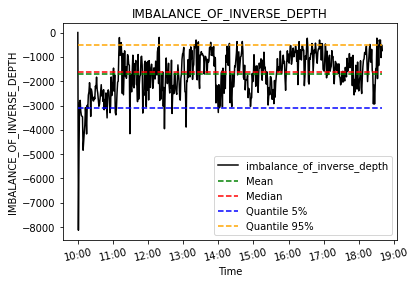

In [40]:
#График для Market_imbalance
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
x['TIME'] = pd.to_datetime(x['TIME'].dt.strftime('{} %H:%M:%S'.format('20150303')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('IMBALANCE_OF_INVERSE_DEPTH')  
plt.plot(x['TIME'], x['IMBALANCE_OF_INVERSE_DEPTH'], color='black', label='imbalance_of_inverse_depth')
plt.plot(x['TIME'], [np.mean(x['IMBALANCE_OF_INVERSE_DEPTH']) for i in range(len(x['IMBALANCE_OF_INVERSE_DEPTH']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['IMBALANCE_OF_INVERSE_DEPTH']) for i in range(len(x['IMBALANCE_OF_INVERSE_DEPTH']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['IMBALANCE_OF_INVERSE_DEPTH']), 0.05) for i in range(len(x['IMBALANCE_OF_INVERSE_DEPTH']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['IMBALANCE_OF_INVERSE_DEPTH']), 0.95) for i in range(len(x['IMBALANCE_OF_INVERSE_DEPTH']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='IMBALANCE_OF_INVERSE_DEPTH')
plt.xticks(rotation=12)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.legend()
plt.show()

<Figure size 720x720 with 0 Axes>

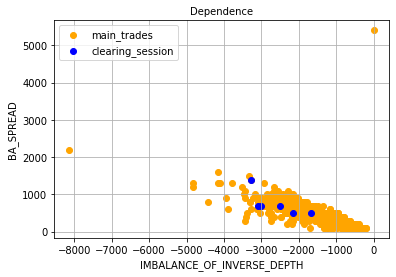

In [43]:
#Зависимость между BA_SPREAD и IMBALANCE OF INVERSE DEPTH с группами точек (основные торги и дневная клиринговая сессия)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
fig, ax = plt.subplots()
plt.scatter(x['IMBALANCE_OF_INVERSE_DEPTH'],x['BA_SPREAD'],color ='orange',label ='main_trades') 
plt.scatter(z['IMBALANCE_OF_INVERSE_DEPTH'],z['BA_SPREAD'],color ='blue',label ='clearing_session')
ax.set_xlabel('IMBALANCE_OF_INVERSE_DEPTH', fontsize = 10)
ax.set_ylabel('BA_SPREAD', fontsize = 10)
ax.set_title('Dependence', fontsize = 10)
ax.grid()
ax.legend()
plt.show()

In [46]:
C = np.corrcoef(x['IMBALANCE_OF_INVERSE_DEPTH'],x['BA_SPREAD'])
C

array([[ 1.        , -0.60263339],
       [-0.60263339,  1.        ]])

<ipython-input-47-832bf66beb1a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


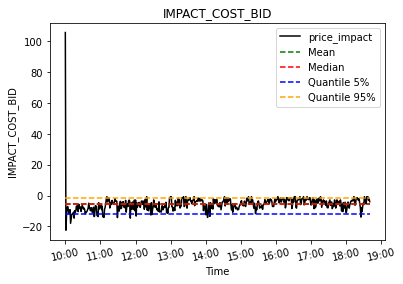

In [47]:
#График для Impact_cost_bid
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
x['TIME'] = pd.to_datetime(x['TIME'].dt.strftime('{} %H:%M:%S'.format('20151123')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('IMPACT_COST_BID')  
plt.plot(x['TIME'], x['IMPACT_COST_BID'], color='black', label='price_impact')
plt.plot(x['TIME'], [np.mean(x['IMPACT_COST_BID']) for i in range(len(x['IMPACT_COST_BID']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['IMPACT_COST_BID']) for i in range(len(x['IMPACT_COST_BID']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['IMPACT_COST_BID']), 0.05) for i in range(len(x['IMPACT_COST_BID']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['IMPACT_COST_BID']), 0.95) for i in range(len(x['IMPACT_COST_BID']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='IMPACT_COST_BID')
plt.xticks(rotation=12)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.legend()
plt.show()

<ipython-input-48-56fd5f70f117>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


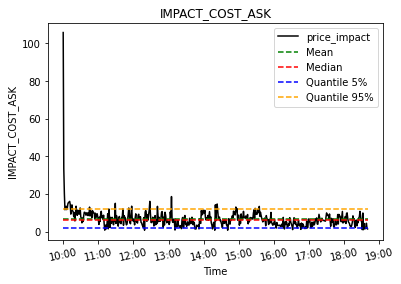

In [48]:
#График для Impact_cost ask
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
x['TIME'] = pd.to_datetime(x['TIME'].dt.strftime('{} %H:%M:%S'.format('20151123')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('IMPACT_COST_ASK')  
plt.plot(x['TIME'], x['IMPACT_COST_ASK'], color='black', label='price_impact')
plt.plot(x['TIME'], [np.mean(x['IMPACT_COST_ASK']) for i in range(len(x['IMPACT_COST_ASK']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['IMPACT_COST_ASK']) for i in range(len(x['IMPACT_COST_ASK']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['IMPACT_COST_ASK']), 0.05) for i in range(len(x['IMPACT_COST_ASK']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['IMPACT_COST_ASK']), 0.95) for i in range(len(x['IMPACT_COST_ASK']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='IMPACT_COST_ASK')
plt.xticks(rotation=12)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.legend()
plt.show()

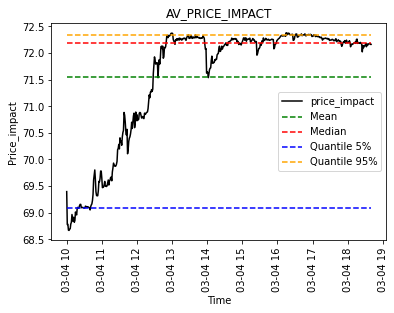

In [49]:
#Переведем колонку TIME в формат времени для построения графиков
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
x['TIME'] = pd.to_datetime(x['TIME'].dt.strftime('{} %H:%M:%S'.format('20150304')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('AV_PRICE_IMPACT')  
plt.plot(x['TIME'], x['AV_PRICE_IMPACT'], color='black', label='price_impact')
plt.plot(x['TIME'], [np.mean(x['AV_PRICE_IMPACT']) for i in range(len(x['AV_PRICE_IMPACT']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['AV_PRICE_IMPACT']) for i in range(len(x['AV_PRICE_IMPACT']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['AV_PRICE_IMPACT']), 0.05) for i in range(len(x['AV_PRICE_IMPACT']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['AV_PRICE_IMPACT']), 0.95) for i in range(len(x['AV_PRICE_IMPACT']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='Price_impact')
plt.xticks(rotation=90)
plt.legend()
plt.show()

<ipython-input-50-9d2cc466f7d0>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


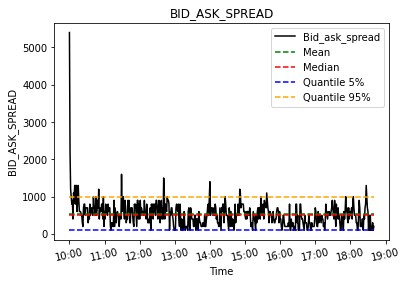

In [50]:
#Переведем колонку TIME в формат времени для построения графиков
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('BID_ASK_SPREAD')  
plt.plot(x['TIME'], x['BA_SPREAD'], color='black', label='Bid_ask_spread')
plt.plot(x['TIME'], [np.mean(x['BA_SPREAD']) for i in range(len(x['BA_SPREAD']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['BA_SPREAD']) for i in range(len(x['BA_SPREAD']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['BA_SPREAD']), 0.05) for i in range(len(x['BA_SPREAD']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['BA_SPREAD']), 0.95) for i in range(len(x['BA_SPREAD']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='BID_ASK_SPREAD')
plt.xticks(rotation=12)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.legend()
plt.show()

<ipython-input-51-6a8528e43a02>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


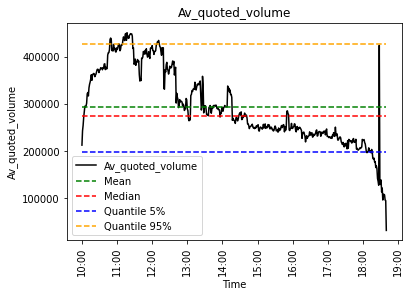

In [51]:
#Переведем колонку TIME в формат времени для построения графиков
from datetime import datetime

x['TIME'] = pd.to_datetime(x['TIME'], format='%H%M%S%f')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Av_quoted_volume')  
plt.plot(x['TIME'], x['Av_quoted_volume'], color='black', label='Av_quoted_volume')
plt.plot(x['TIME'], [np.mean(x['Av_quoted_volume']) for i in range(len(x['Av_quoted_volume']))], label='Mean', color='green', linestyle='--')
plt.plot(x['TIME'], [np.median(x['Av_quoted_volume']) for i in range(len(x['Av_quoted_volume']))], label='Median', color='red', linestyle='--')
plt.plot(x['TIME'], [np.quantile((x['Av_quoted_volume']), 0.05) for i in range(len(x['Av_quoted_volume']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(x['TIME'], [np.quantile((x['Av_quoted_volume']), 0.95) for i in range(len(x['Av_quoted_volume']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='Av_quoted_volume')
plt.xticks(rotation=90)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.legend()
plt.show()

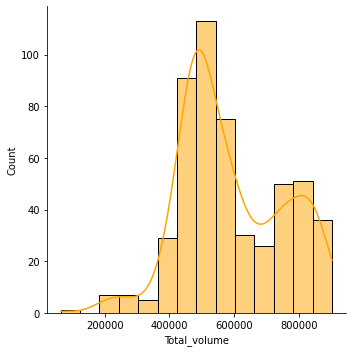

In [52]:
#Построение гистограммы и плотности распределения для общего объема за торговый день по ALRS
import seaborn as sns

sns_plot = sns.displot(data = x['Total_volume'],color = 'orange',kde = True)

In [53]:
#Поиск 90-% персентиля для котируемого объема.  
#Поиск 90- персентиля 
trades = x['Total_volume']
per_trades_90 = np.percentile(trades, 90)
print('90%-percentile:', per_trades_90)

90%-percentile: 830400.0


In [54]:
#Расчет лямбды Кайла
import numpy as np
#Расчет лямбды для стороны Bid
best_a_b = pd.DataFrame(x, columns = ['TIME','Best_bid','Best_ask','Total_volume'])
price_diff = best_a_b.Best_bid.diff()
#Лямбда Bid считается в базисных пунктах
lambda_bid = pd.DataFrame((abs(price_diff)/trades)*10000)
lambda_bid.columns=['Lambda_bid']
#Расчет лямбды для стороны Ask
price_diff_1 = best_a_b.Best_ask.diff()
#Лямбда ask считается в базисных пунктах,цена берется по модулю
lambda_ask = pd.DataFrame((abs(price_diff_1)/trades)*10000)
lambda_ask.columns=['Lambda_ask']
lambdas = pd.concat([lambda_bid,lambda_ask],axis = 1)
#Поиск среднего значения лямбды и переведем в базисные пункты
av_lambda = pd.DataFrame(lambdas.mean(axis=1))
av_lambda.columns=['Average_lambda']
#Поиск обратного показателя глубины - Inverse depth и перевод в базисные пункты
inv_lambda = pd.DataFrame(1/av_lambda)
inv_lambda.columns=['Inverse_lambda']
#Cоздание общего дейтафрейма
lamb = pd.concat([x[['TIME']],lambda_bid,lambda_ask,av_lambda,inv_lambda],axis = 1).replace(np.nan,0)
lamb

,TIME,Lambda_bid,Lambda_ask,Average_lambda,Inverse_lambda
0,2015-03-04 10:00:00,0.000000,0.000000,0.000000,0.0000
1,2015-03-04 10:01:00,0.004730,0.001851,0.003290,303.9375
2,2015-03-04 10:02:00,0.001374,0.000589,0.000982,1018.8000
3,2015-03-04 10:03:00,0.001655,0.002022,0.001839,543.9000
4,2015-03-04 10:04:00,0.000000,0.000354,0.000177,5656.0000
...,...,...,...,...,...
516,2015-03-04 18:36:00,0.000000,0.000461,0.000231,4334.0000
517,2015-03-04 18:37:00,0.000466,0.000000,0.000233,4292.0000
518,2015-03-04 18:38:00,0.001040,0.000000,0.000520,1923.0000
519,2015-03-04 18:39:00,0.001050,0.000000,0.000525,1905.0000


In [55]:
x[['Best_bid','Best_ask','MID_PRICE','BA_SPREAD','Av_quoted_volume','IMBALANCE_OF_INVERSE_DEPTH']].describe()

,Best_bid,Best_ask,MID_PRICE,BA_SPREAD,Av_quoted_volume,IMBALANCE_OF_INVERSE_DEPTH
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,71.512035,71.564645,71.538340,526.103647,294000.191939,-1706.845532
std,1.138140,1.126366,1.132131,353.675727,79312.681775,883.782262
min,68.400000,68.690000,68.650000,100.000000,32050.000000,-8126.661468
25%,70.850000,70.890000,70.870000,300.000000,240300.000000,-2273.205037
50%,72.160000,72.200000,72.175000,500.000000,275200.000000,-1622.915723
75%,72.250000,72.290000,72.270000,700.000000,364200.000000,-1041.268216
max,72.370000,72.390000,72.380000,5400.000000,451100.000000,0.000000


In [56]:
import pandas as pd
import numpy as np

def calc(sec, time_s, time_e, step, typE, conn):
    
    # time_s = левая часть интервала времени (HHMMSSZZZ)
    # time_e = правая часть интервала (HHMMSSZZZ)
    # step = длительность шага (т.е. для пятиминутного шага step = 5)
    # typE = единица измерения шага ('h', 'm', 's' или любое другое обозначение для миллисекунд)
    # sec = код бумаги в формате '\'CODE\''
    # conn = connection
    
    query="SELECT * FROM order_log20150303 WHERE \"TIME\"<="+str(time_e)+" AND \"SECCODE\"="+sec
    orders=pd.read_sql_query(query,conn)
        
    # Переводим начальное время в миллисекунды
    dts = str(time_s)
    h,m,s,z = int(dts[:2]),int(dts[2:4]),int(dts[4:6]),int(dts[6:])
    tsm = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим конечное время в миллисекунды
    dte = str(time_e)
    h,m,s,z = int(dte[:2]),int(dte[2:4]),int(dte[4:6]),int(dte[6:])
    tem = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим шаг в миллисекунды
    if typE == 'h':
        step = step * 3600000
    elif typE == 'm':
        step = step * 60000
    elif typE == 's':
        step = step * 1000

    times = []
    
    while tsm < tem:
        
        # Разбиваем время на отдельные часы, минуты, секунды и миллисекунды
        ha = tsm // 3600000
        ma = (tsm % 3600000) // 60000
        sa = (tsm % 60000) // 1000
        za = tsm % 1000
        
        # Переводим текущее время в "привычный формат"; добавляем его в список
        tmp = ha * 10000000 + ma * 100000 + sa * 1000 + za
        times.append(tmp)
        
        tsm = tsm + step;
    
    # Добавляем конечное время в список
    times.append(time_e)
    # Создаем пустой датафрейм
    
    results = pd.DataFrame(columns=['SECCODE','TIME','ASK_IMPACT','BID_IMPACT','MID_PRICE','BA_SPREAD','BEST_B_VOL','BEST_S_VOL','M_imbalance','Bid_quoted_volume','Ask_quoted_volume','Quoted_spread','Av_quoted_volume','Best_bid','Best_ask','Total_volume'])
    
    # Далее идет функция расчета показателей
    MID_PRICE = []
    BID_IMPACT = []
    ASK_IMPACT = []
    BA_SPREAD = []
    BEST_B_VOL = []
    BEST_S_VOL = []
    M_imbalance = []
    Bid_quoted_volume = []
    Ask_quoted_volume = []
    Quoted_spread = []
    Av_quoted_volume= []
    Best_bid = []
    Best_ask = []
    Total_volume = []
             
    for i in times:
        
        orders_i = orders[orders['TIME']<=i]
        
    # Устанавливаем маску лимитных заявок
        no_mrk_ind=orders_i['PRICE']!=0

    # Таблица выставленных заявок
        plc=orders_i[['ORDERNO','BUYSELL','PRICE','VOLUME']][(orders_i['ACTION']==1) & no_mrk_ind]

    # Таблица отозванных заявок
        wdr=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==0) & no_mrk_ind]
    
    # Таблица исполненных объемов
        trds=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==2) & no_mrk_ind] 
        trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
        trds['ORDERNO']=trds.index
        trds.index=range(trds.shape[0])

    # Книга (aka стакан, aka LOB)
        lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
        lob=pd.merge(lob,trds, on='ORDERNO', how='left')
        lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
        lob=lob.fillna(0)
        lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
        lob=lob[lob['TOTAL_VOL']>0]
        
        #Поиск общего объема на каждом из интервалов
        total_volume = (lob['TOTAL_VOL']).sum()
        Total_volume.append(total_volume)
        
        #Построение стакана       
        lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
        lob.sort_index(axis=0,inplace=True, ascending=False)
        lob=lob.fillna(0)
        
        bid = lob[lob['B']>0].index[0:10]
        ask = lob[lob['S']>0].index[-10:]
        ask.append(bid)
        best_lob=lob.loc[ask.append(bid)]
        
        best_lob = pd.DataFrame(best_lob).reset_index().rename_axis(None, axis=1)
        
        #Расчет, как сдвинется цена Sell, если исполнится объем 30000(Price impact on the Sell side)
        df2 = best_lob.copy()
        df = df2.loc[df2.S != 0.0, :][::-1]
          
        
        res = 0
        s = []
        for i in df.index:
            if res > 30000:
                delta = 30000 - (res - df.loc[i+1, 'S'])
                p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*delta)/30000
                break
            elif res ==30000:
                p = (sum(s[:-1]) + df.loc[i+1, 'PRICE']*df.loc[i+1, 'S'])/30000
                break
            else:
                res += df.loc[i, 'S']
                s.append(df.loc[i, 'S'] * df.loc[i, 'PRICE'])
        
        print('ask_impact',p)
        ASK_IMPACT.append(p) 
        
        #Расчет, как сдвинется цена Bid,если исполнится объем 30000
        df3 = best_lob.copy()
        df = df3.loc[df3.B != 0.0, :]
          
        
        res = 0
        s = []
        for i in df.index:
            if res > 30000:
                delta = 30000 - (res - df.loc[i-1, 'B'])
                p = (sum(s[:-1]) + df.loc[i-1, 'PRICE']*delta)/30000
                break
            elif res == 30000:
                p = (sum(s[:-1]) + df.loc[i-1, 'PRICE']*df.loc[i-1, 'B'])/30000
                break
            else:
                res += df.loc[i, 'B']
                s.append(df.loc[i, 'B'] * df.loc[i, 'PRICE'])
        print('bid_impact',p)
        BID_IMPACT.append(p)
        
        #Нахождение лучшей цены bid и ask
    
        best_bid=max(lob[lob['B']>0].index)
        best_ask=min(lob[lob['S']>0].index)
        Best_bid.append(best_bid)
        Best_ask.append(best_ask)
        
        #Расчет показателей ценовой динамики и ликвидности, вычисляемые на основе книги лимитированных заявок
         
        mid_price=(best_bid+best_ask)/2
        MID_PRICE.append(mid_price)
        
        #Переведем в базисные пункты для расчетов PCA bid_ask spread

        bid_ask_spread=(best_ask-best_bid)*10000
        BA_SPREAD.append(bid_ask_spread)
        
        best_B_vol = lob['B'].loc[best_bid]
        BEST_B_VOL.append(best_B_vol)
        
        best_S_vol = lob['S'].loc[best_ask]
        BEST_S_VOL.append(best_S_vol)
        
        market_imbalance = (best_B_vol-best_S_vol)/ (best_B_vol+best_S_vol)
        M_imbalance.append(market_imbalance)
        
        bid_quoted_volume = (lob['B']).sum()
        Bid_quoted_volume.append(bid_quoted_volume)   
        
        ask_quoted_volume = (lob['S']).sum()
        Ask_quoted_volume.append(ask_quoted_volume)
        
        quoted_spread = ((best_ask-best_bid)/mid_price)*100
        Quoted_spread.append(quoted_spread)
        
        av_quoted_volume =(bid_quoted_volume+ask_quoted_volume)/2
        Av_quoted_volume.append(av_quoted_volume)
        
                                     
    results = pd.DataFrame({'SECCODE':sec, 'TIME': times,'ASK_IMPACT':ASK_IMPACT,'BID_IMPACT':BID_IMPACT,'MID_PRICE': MID_PRICE,'BA_SPREAD':BA_SPREAD,'BEST_B_VOL':BEST_B_VOL,'BEST_S_VOL':BEST_S_VOL, 'M_imbalance':M_imbalance,'Bid_quoted_volume':Bid_quoted_volume, 'Ask_quoted_volume':Ask_quoted_volume, 'Quoted_spread':Quoted_spread,'Av_quoted_volume':Av_quoted_volume,'Best_bid':best_bid,'Best_ask':best_ask,'Total_volume':Total_volume})    
    results['MID_PRICE'] = MID_PRICE
    results['ASK_IMPACT']=ASK_IMPACT
    results['BID_IMPACT']=BID_IMPACT
    results['BA_SPREAD'] = BA_SPREAD
    results['BEST_B_VOL'] = BEST_B_VOL
    results['BEST_S_VOL'] = BEST_S_VOL
    results['M_imbalance'] = M_imbalance
    results['TIME']= times
    results['Bid_quoted_volume']= Bid_quoted_volume
    results['Ask_quoted_volume']=Ask_quoted_volume
    results['Quoted_spread']=Quoted_spread
    results['Av_quoted_volume']=Av_quoted_volume
    results['Best_bid']=Best_bid
    results['Best_ask']=Best_ask
    results['Total_volume']=Total_volume
    
    
    return results   

In [57]:
y = calc('\'SBER\'', 100000000, 184000000, 1, 'm', conn)
y

ask_impact 76.13626666666667
bid_impact 76.01178
ask_impact 76.02917333333333
bid_impact 75.95306000000001
ask_impact 75.99573333333333
bid_impact 75.91534333333333
ask_impact 76.08994666666666
bid_impact 76.01978666666668
ask_impact 76.15789000000001
bid_impact 76.1
ask_impact 76.09549333333332
bid_impact 76.02428333333333
ask_impact 76.13426666666666
bid_impact 76.06340666666668
ask_impact 76.16193666666668
bid_impact 76.07160666666667
ask_impact 76.08163333333333
bid_impact 76.07
ask_impact 76.14944333333332
bid_impact 76.09033333333333
ask_impact 76.14124000000001
bid_impact 76.10415333333334
ask_impact 76.09804000000001
bid_impact 76.07569333333333
ask_impact 76.04792333333334
bid_impact 76.03
ask_impact 76.10386666666666
bid_impact 76.05542
ask_impact 76.18798666666667
bid_impact 76.134
ask_impact 76.15965
bid_impact 76.11141666666667
ask_impact 76.15815
bid_impact 76.10407333333335
ask_impact 76.18558666666667
bid_impact 76.13068000000001
ask_impact 76.29402666666667
bid_impact 

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
0,'SBER',100000000,76.136267,76.011780,76.060,600.0,11530.0,10000.0,0.071064,2906690.0,1519290.0,0.078885,2212990.0,76.03,76.09,4425980.0
1,'SBER',100100000,76.029173,75.953060,75.990,600.0,10310.0,2480.0,0.612197,3796280.0,2350480.0,0.078958,3073380.0,75.96,76.02,6146760.0
2,'SBER',100200000,75.995733,75.915343,75.955,300.0,300.0,300.0,0.000000,3543870.0,2283790.0,0.039497,2913830.0,75.94,75.97,5827660.0
3,'SBER',100300000,76.089947,76.019787,76.055,100.0,3100.0,1500.0,0.347826,3894140.0,2370610.0,0.013148,3132375.0,76.05,76.06,6264750.0
4,'SBER',100400000,76.157890,76.100000,76.120,400.0,40980.0,7750.0,0.681921,4057940.0,2276000.0,0.052549,3166970.0,76.10,76.14,6333940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'SBER',183600000,75.720030,75.666547,75.695,100.0,4980.0,8190.0,-0.243736,1481010.0,1045720.0,0.013211,1263365.0,75.69,75.70,2526730.0
517,'SBER',183700000,75.680583,75.649327,75.665,100.0,3020.0,100.0,0.935897,1553500.0,1133600.0,0.013216,1343550.0,75.66,75.67,2687100.0
518,'SBER',183800000,75.721060,75.650117,75.695,100.0,200.0,7720.0,-0.949495,1658430.0,1093930.0,0.013211,1376180.0,75.69,75.70,2752360.0
519,'SBER',183900000,75.683517,75.606493,75.650,400.0,300.0,2450.0,-0.781818,1543220.0,1061230.0,0.052875,1302225.0,75.63,75.67,2604450.0


In [58]:
#Расчет Impact cost: https://tavaga.com/tavagapedia/impact-cost/ в базисных пунктах и добавление колонки в дейтафрейм
import numpy as np
y['IMPACT_COST_BID'] = (y['BID_IMPACT'] - y['MID_PRICE'])/(y['MID_PRICE'])
y

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,IMPACT_COST_BID
0,'SBER',100000000,76.136267,76.011780,76.060,600.0,11530.0,10000.0,0.071064,2906690.0,1519290.0,0.078885,2212990.0,76.03,76.09,4425980.0,-0.000634
1,'SBER',100100000,76.029173,75.953060,75.990,600.0,10310.0,2480.0,0.612197,3796280.0,2350480.0,0.078958,3073380.0,75.96,76.02,6146760.0,-0.000486
2,'SBER',100200000,75.995733,75.915343,75.955,300.0,300.0,300.0,0.000000,3543870.0,2283790.0,0.039497,2913830.0,75.94,75.97,5827660.0,-0.000522
3,'SBER',100300000,76.089947,76.019787,76.055,100.0,3100.0,1500.0,0.347826,3894140.0,2370610.0,0.013148,3132375.0,76.05,76.06,6264750.0,-0.000463
4,'SBER',100400000,76.157890,76.100000,76.120,400.0,40980.0,7750.0,0.681921,4057940.0,2276000.0,0.052549,3166970.0,76.10,76.14,6333940.0,-0.000263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'SBER',183600000,75.720030,75.666547,75.695,100.0,4980.0,8190.0,-0.243736,1481010.0,1045720.0,0.013211,1263365.0,75.69,75.70,2526730.0,-0.000376
517,'SBER',183700000,75.680583,75.649327,75.665,100.0,3020.0,100.0,0.935897,1553500.0,1133600.0,0.013216,1343550.0,75.66,75.67,2687100.0,-0.000207
518,'SBER',183800000,75.721060,75.650117,75.695,100.0,200.0,7720.0,-0.949495,1658430.0,1093930.0,0.013211,1376180.0,75.69,75.70,2752360.0,-0.000593
519,'SBER',183900000,75.683517,75.606493,75.650,400.0,300.0,2450.0,-0.781818,1543220.0,1061230.0,0.052875,1302225.0,75.63,75.67,2604450.0,-0.000575


In [59]:
#Расчет Impact cost: https://tavaga.com/tavagapedia/impact-cost/ в базисных пунктах и добавление колонки в дейтафрейм
import numpy as np
y['IMPACT_COST_ASK'] = (y['ASK_IMPACT'] - y['MID_PRICE'])/(y['MID_PRICE'])
y

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,IMPACT_COST_BID,IMPACT_COST_ASK
0,'SBER',100000000,76.136267,76.011780,76.060,600.0,11530.0,10000.0,0.071064,2906690.0,1519290.0,0.078885,2212990.0,76.03,76.09,4425980.0,-0.000634,0.001003
1,'SBER',100100000,76.029173,75.953060,75.990,600.0,10310.0,2480.0,0.612197,3796280.0,2350480.0,0.078958,3073380.0,75.96,76.02,6146760.0,-0.000486,0.000516
2,'SBER',100200000,75.995733,75.915343,75.955,300.0,300.0,300.0,0.000000,3543870.0,2283790.0,0.039497,2913830.0,75.94,75.97,5827660.0,-0.000522,0.000536
3,'SBER',100300000,76.089947,76.019787,76.055,100.0,3100.0,1500.0,0.347826,3894140.0,2370610.0,0.013148,3132375.0,76.05,76.06,6264750.0,-0.000463,0.000459
4,'SBER',100400000,76.157890,76.100000,76.120,400.0,40980.0,7750.0,0.681921,4057940.0,2276000.0,0.052549,3166970.0,76.10,76.14,6333940.0,-0.000263,0.000498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'SBER',183600000,75.720030,75.666547,75.695,100.0,4980.0,8190.0,-0.243736,1481010.0,1045720.0,0.013211,1263365.0,75.69,75.70,2526730.0,-0.000376,0.000331
517,'SBER',183700000,75.680583,75.649327,75.665,100.0,3020.0,100.0,0.935897,1553500.0,1133600.0,0.013216,1343550.0,75.66,75.67,2687100.0,-0.000207,0.000206
518,'SBER',183800000,75.721060,75.650117,75.695,100.0,200.0,7720.0,-0.949495,1658430.0,1093930.0,0.013211,1376180.0,75.69,75.70,2752360.0,-0.000593,0.000344
519,'SBER',183900000,75.683517,75.606493,75.650,400.0,300.0,2450.0,-0.781818,1543220.0,1061230.0,0.052875,1302225.0,75.63,75.67,2604450.0,-0.000575,0.000443


In [60]:
#Найдем разность между Impact_cost_bid и Impact_cost_ask и разделим на среднюю цену
y['IMBALANCE_OF_INVERSE_DEPTH']= ((y['IMPACT_COST_BID']-y['IMPACT_COST_ASK'])/y['MID_PRICE'])*10000
y

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,IMPACT_COST_BID,IMPACT_COST_ASK,IMBALANCE_OF_INVERSE_DEPTH
0,'SBER',100000000,76.136267,76.011780,76.060,600.0,11530.0,10000.0,0.071064,2906690.0,1519290.0,0.078885,2212990.0,76.03,76.09,4425980.0,-0.000634,0.001003,-0.215184
1,'SBER',100100000,76.029173,75.953060,75.990,600.0,10310.0,2480.0,0.612197,3796280.0,2350480.0,0.078958,3073380.0,75.96,76.02,6146760.0,-0.000486,0.000516,-0.131810
2,'SBER',100200000,75.995733,75.915343,75.955,300.0,300.0,300.0,0.000000,3543870.0,2283790.0,0.039497,2913830.0,75.94,75.97,5827660.0,-0.000522,0.000536,-0.139344
3,'SBER',100300000,76.089947,76.019787,76.055,100.0,3100.0,1500.0,0.347826,3894140.0,2370610.0,0.013148,3132375.0,76.05,76.06,6264750.0,-0.000463,0.000459,-0.121293
4,'SBER',100400000,76.157890,76.100000,76.120,400.0,40980.0,7750.0,0.681921,4057940.0,2276000.0,0.052549,3166970.0,76.10,76.14,6333940.0,-0.000263,0.000498,-0.099909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,'SBER',183600000,75.720030,75.666547,75.695,100.0,4980.0,8190.0,-0.243736,1481010.0,1045720.0,0.013211,1263365.0,75.69,75.70,2526730.0,-0.000376,0.000331,-0.093343
517,'SBER',183700000,75.680583,75.649327,75.665,100.0,3020.0,100.0,0.935897,1553500.0,1133600.0,0.013216,1343550.0,75.66,75.67,2687100.0,-0.000207,0.000206,-0.054595
518,'SBER',183800000,75.721060,75.650117,75.695,100.0,200.0,7720.0,-0.949495,1658430.0,1093930.0,0.013211,1376180.0,75.69,75.70,2752360.0,-0.000593,0.000344,-0.123816
519,'SBER',183900000,75.683517,75.606493,75.650,400.0,300.0,2450.0,-0.781818,1543220.0,1061230.0,0.052875,1302225.0,75.63,75.67,2604450.0,-0.000575,0.000443,-0.134587


In [61]:
#Выберем точки с дневной клиринговой сессией с 14:00 до 14:05.
v = y[(y['TIME'] >= 140000000)&(y['TIME'] <= 140500000)]
v

,SECCODE,TIME,ASK_IMPACT,BID_IMPACT,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume,IMPACT_COST_BID,IMPACT_COST_ASK,IMBALANCE_OF_INVERSE_DEPTH
240,'SBER',140000000,76.607377,76.554113,76.585,100.0,3000.0,370.0,0.780415,4911710.0,4537840.0,0.013057,4724775.0,76.58,76.59,9449550.0,-0.000403,0.000292,-0.090812
241,'SBER',140100000,76.661063,76.597223,76.630,200.0,2990.0,370.0,0.779762,5063450.0,4496170.0,0.026099,4779810.0,76.62,76.64,9559620.0,-0.000428,0.000405,-0.108716
242,'SBER',140200000,76.660090,76.605853,76.635,100.0,200.0,490.0,-0.420290,5140550.0,4341530.0,0.013049,4741040.0,76.63,76.64,9482080.0,-0.000380,0.000327,-0.092350
243,'SBER',140300000,76.638540,76.581633,76.610,200.0,8300.0,1120.0,0.762208,5091200.0,4582160.0,0.026106,4836680.0,76.60,76.62,9673360.0,-0.000370,0.000373,-0.096960
244,'SBER',140400000,76.699867,76.640710,76.680,200.0,1130.0,6580.0,-0.706874,5193440.0,4403780.0,0.026082,4798610.0,76.67,76.69,9597220.0,-0.000512,0.000259,-0.100610
245,'SBER',140500000,76.677263,76.616423,76.650,200.0,4090.0,4770.0,-0.076749,5134590.0,4640170.0,0.026093,4887380.0,76.64,76.66,9774760.0,-0.000438,0.000356,-0.103554


<Figure size 720x720 with 0 Axes>

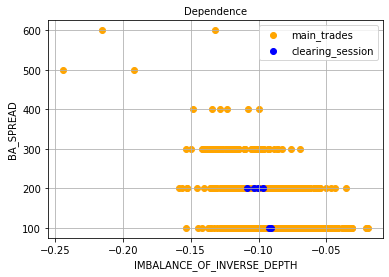

In [62]:
#Зависимость между BA_SPREAD и IMBALANCE OF INVERSE DEPTH с группами точек (основные торги и дневная клиринговая сессия)

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
fig, ax = plt.subplots()
plt.scatter(y['IMBALANCE_OF_INVERSE_DEPTH'],y['BA_SPREAD'],color ='orange',label ='main_trades') 
plt.scatter(v['IMBALANCE_OF_INVERSE_DEPTH'],v['BA_SPREAD'],color ='blue',label ='clearing_session')
ax.set_xlabel('IMBALANCE_OF_INVERSE_DEPTH', fontsize = 10)
ax.set_ylabel('BA_SPREAD', fontsize = 10)
ax.set_title('Dependence', fontsize = 10)
ax.grid()
ax.legend()
plt.show()

<ipython-input-63-014721c9ce8c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


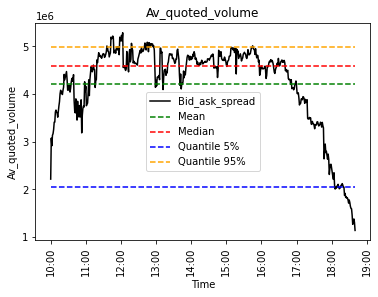

In [63]:
#Переведем колонку TIME в формат времени для построения графиков
from datetime import datetime

y['TIME'] = pd.to_datetime(y['TIME'], format='%H%M%S%f')
y['TIME'] = pd.to_datetime(y['TIME'].dt.strftime('{} %H:%M:%S'.format('20150303')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('Av_quoted_volume')  
plt.plot(y['TIME'], y['Av_quoted_volume'], color='black', label='Bid_ask_spread')
plt.plot(y['TIME'], [np.mean(y['Av_quoted_volume']) for i in range(len(y['Av_quoted_volume']))], label='Mean', color='green', linestyle='--')
plt.plot(y['TIME'], [np.median(y['Av_quoted_volume']) for i in range(len(y['Av_quoted_volume']))], label='Median', color='red', linestyle='--')
plt.plot(y['TIME'], [np.quantile((y['Av_quoted_volume']), 0.05) for i in range(len(y['Av_quoted_volume']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(y['TIME'], [np.quantile((y['Av_quoted_volume']), 0.95) for i in range(len(y['Av_quoted_volume']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='Av_quoted_volume')
plt.xticks(rotation=90)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.legend()
plt.show()

<ipython-input-64-e3394874396c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


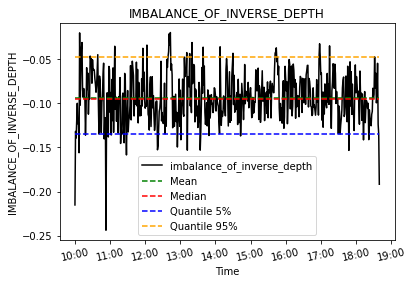

In [64]:
from datetime import datetime

y['TIME'] = pd.to_datetime(y['TIME'], format='%H%M%S%f')
y['TIME'] = pd.to_datetime(y['TIME'].dt.strftime('{} %H:%M:%S'.format('20150303')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('IMBALANCE_OF_INVERSE_DEPTH')  
plt.plot(y['TIME'], y['IMBALANCE_OF_INVERSE_DEPTH'], color='black', label='imbalance_of_inverse_depth')
plt.plot(y['TIME'], [np.mean(y['IMBALANCE_OF_INVERSE_DEPTH']) for i in range(len(y['IMBALANCE_OF_INVERSE_DEPTH']))], label='Mean', color='green', linestyle='--')
plt.plot(y['TIME'], [np.median(y['IMBALANCE_OF_INVERSE_DEPTH']) for i in range(len(y['IMBALANCE_OF_INVERSE_DEPTH']))], label='Median', color='red', linestyle='--')
plt.plot(y['TIME'], [np.quantile((y['IMBALANCE_OF_INVERSE_DEPTH']), 0.05) for i in range(len(y['IMBALANCE_OF_INVERSE_DEPTH']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(y['TIME'], [np.quantile((y['IMBALANCE_OF_INVERSE_DEPTH']), 0.95) for i in range(len(y['IMBALANCE_OF_INVERSE_DEPTH']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='IMBALANCE_OF_INVERSE_DEPTH')
plt.xticks(rotation=12)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.legend()
plt.show()

In [65]:
y[['Best_bid','Best_ask','MID_PRICE','BA_SPREAD','Av_quoted_volume','IMBALANCE_OF_INVERSE_DEPTH']].describe()

,Best_bid,Best_ask,MID_PRICE,BA_SPREAD,Av_quoted_volume,IMBALANCE_OF_INVERSE_DEPTH
count,521.000000,521.000000,521.000000,521.000000,5.210000e+02,521.000000
mean,76.165816,76.182092,76.173954,162.763916,4.219800e+06,-0.093367
std,0.458660,0.458117,0.458371,80.355221,8.824532e+05,0.028218
min,74.980000,75.020000,75.005000,100.000000,1.135585e+06,-0.243819
25%,75.790000,75.800000,75.795000,100.000000,3.900265e+06,-0.112239
50%,76.240000,76.260000,76.250000,100.000000,4.577930e+06,-0.094673
75%,76.580000,76.600000,76.590000,200.000000,4.798055e+06,-0.073070
max,76.880000,76.900000,76.890000,600.000000,5.286075e+06,-0.019696


In [66]:
#Дейтафрейм для Альросы для расчета PCA
import pandas as pd
Liq_met = pd.DataFrame(x,columns = ['TIME','BA_SPREAD','Av_quoted_volume','IMBALANCE_OF_INVERSE_DEPTH'])
Liq_met

,TIME,BA_SPREAD,Av_quoted_volume,IMBALANCE_OF_INVERSE_DEPTH
0,2015-03-04 10:00:00,5400.0,212800.0,0.000000
1,2015-03-04 10:01:00,2200.0,243150.0,-8126.661468
2,2015-03-04 10:02:00,1200.0,254700.0,-4839.319368
3,2015-03-04 10:03:00,1000.0,271950.0,-2859.448598
4,2015-03-04 10:04:00,800.0,282800.0,-2788.138106
...,...,...,...,...
516,2015-03-04 18:36:00,200.0,108350.0,-426.225632
517,2015-03-04 18:37:00,100.0,107300.0,-307.147085
518,2015-03-04 18:38:00,300.0,96150.0,-1029.227917
519,2015-03-04 18:39:00,100.0,95250.0,-506.792690


In [67]:
#Cтандартизация мер ликвидности для Альросы
from sklearn.preprocessing import StandardScaler
features = ['BA_SPREAD','IMBALANCE_OF_INVERSE_DEPTH','Av_quoted_volume']
# Отделение features
x1= Liq_met.loc[:, features].values
# Отделение времени
y1 = Liq_met.loc[:,['TIME']].values
# Standardizing 
x1 = StandardScaler().fit_transform(x1)
x1 = pd.DataFrame(x1,columns = ['BA_SPREAD','IMBALANCE_OF_INVERSE_DEPTH','Av_quoted_volume'])
x1

,BA_SPREAD,IMBALANCE_OF_INVERSE_DEPTH,Av_quoted_volume
0,13.793937,1.933153,-1.024782
1,4.737405,-7.271006,-0.641752
2,1.907239,-3.547802,-0.495986
3,1.341205,-1.305424,-0.278283
4,0.775172,-1.224659,-0.141351
...,...,...,...
516,-0.922928,1.450415,-2.342987
517,-1.205944,1.585281,-2.356239
518,-0.639911,0.767461,-2.496957
519,-1.205944,1.359165,-2.508315


<Figure size 720x720 with 0 Axes>

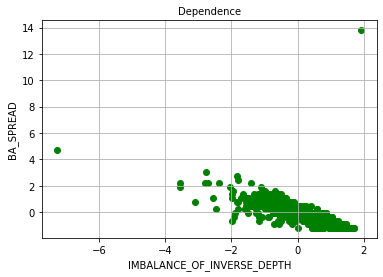

In [68]:
#Scatter plot для СТАНДАРТИЗИРОВАННЫХ мер ликвидности 
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
fig, ax = plt.subplots()
plt.scatter(x1['IMBALANCE_OF_INVERSE_DEPTH'],x1['BA_SPREAD'],color ='green') 
ax.set_xlabel('IMBALANCE_OF_INVERSE_DEPTH', fontsize = 10)
ax.set_ylabel('BA_SPREAD', fontsize = 10)
ax.set_title('Dependence', fontsize = 10)
ax.grid()
plt.show()

In [69]:
C = np.corrcoef(x1['BA_SPREAD'],x1['IMBALANCE_OF_INVERSE_DEPTH'])
C

array([[ 1.        , -0.60263339],
       [-0.60263339,  1.        ]])

In [70]:
#Расчет PCA (3 столбца сворачиваются в два)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x1)
print("Variance of PCA1 is % s"
      %pca.explained_variance_ratio_)
print("Explained_variance is % s"
      %pca.explained_variance_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1','principal component 2'])
principalDf

Variance of PCA1 is [0.56656078 0.30747238]
Explained_variance is [1.70295095 0.92419103]


,principal component 1,principal component 2
0,7.176269,5.919529
1,7.773778,3.230125
2,3.469468,1.591506
3,1.653437,0.914868
4,1.283072,0.566020
...,...,...
516,-2.403218,1.633894
517,-2.681491,1.523453
518,-1.809859,1.962247
519,-2.580643,1.689680


In [71]:
#Наложение оси времени
finalDf = pd.concat([principalDf, Liq_met[['TIME']]], axis = 1)
finalDf = finalDf.set_index('TIME')
finalDf

,principal component 1,principal component 2
TIME,,
2015-03-04 10:00:00,7.176269,5.919529
2015-03-04 10:01:00,7.773778,3.230125
2015-03-04 10:02:00,3.469468,1.591506
2015-03-04 10:03:00,1.653437,0.914868
2015-03-04 10:04:00,1.283072,0.566020
...,...,...
2015-03-04 18:36:00,-2.403218,1.633894
2015-03-04 18:37:00,-2.681491,1.523453
2015-03-04 18:38:00,-1.809859,1.962247


In [99]:
#Разница между значениями PCA (velocity) для Альросы
#Убрать NaN значения
delta_PCA = finalDf.diff()
delta_PCA.fillna(0, inplace=True)
delta_PCA.head(100)

,principal component 1,principal component 2
TIME,,
2015-03-04 10:00:00,0.000000,0.000000
2015-03-04 10:01:00,0.597510,-2.689404
2015-03-04 10:02:00,-4.304310,-1.638619
2015-03-04 10:03:00,-1.816031,-0.676638
2015-03-04 10:04:00,-0.370365,-0.348847
...,...,...
2015-03-04 11:35:00,1.918973,0.651010
2015-03-04 11:36:00,-0.342712,-0.139616
2015-03-04 11:37:00,-1.477762,-0.587901


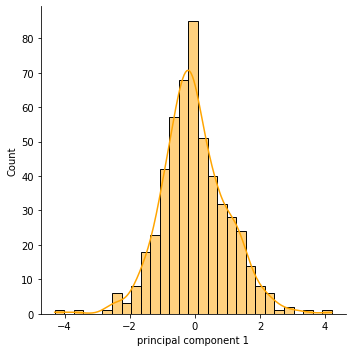

In [100]:
#Гистограмма распределения для DELTA PCA
import seaborn as sns

sns_plot = sns.displot(data = delta_PCA['principal component 1'],color = 'orange',kde = True)

In [74]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\delta_PCA_20150303.xlsx') as writer:
    delta_PCA.to_excel(writer)

In [102]:
#Поиск 95% и 5% персентиля для 1-ой бумаги
import numpy as np
t_95 = np.percentile(delta_PCA['principal component 1'],95)
t_5 = np.percentile(delta_PCA['principal component 1'],5)
print('Percentile_95:',t_95,'Percentile_5:',t_5)

Percentile_95: 1.667846153205696 Percentile_5: -1.525015170276567


In [78]:
#Определим события для первой бумаги. Ставим 1, если событие произошло, 0 - в противном случае. Далее будет проводить тесты. 
df = finalDf['principal component 1']
df1 = df.diff()
df1['events'] = np.where(df1>=1.81, '1', '0')
df1['events']

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [80]:
#Выгрузим events для тестов
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\events.xlsx') as writer:
    df1.to_excel(writer)

<Figure size 360x360 with 0 Axes>

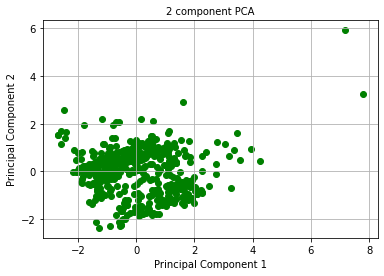

In [81]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
fig, ax = plt.subplots()
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],color ='green') 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 10)
ax.grid()
plt.show()

In [82]:
#Расчет лямбды для стороны Bid для Сбера
best_a_b1 = pd.DataFrame(y, columns = ['TIME','Best_bid','Best_ask'])
price_diff1 = best_a_b1.Best_bid.diff()
#Поиск 90- персентиля и лямбды Bid
trades1 = y['Total_volume']
per_trades1_90 = np.percentile(trades1, 90)
print(per_trades1_90)
lambda_bid1= pd.DataFrame((abs(price_diff1)/trades1)*10000)
lambda_bid1.columns=['Lambda_bid']
#Расчет лямбды для стороны Ask
price_diff_1 = best_a_b1.Best_ask.diff()
lambda_ask1 = pd.DataFrame((abs(price_diff_1)/trades1)*10000)
lambda_ask1.columns=['Lambda_ask']
lambdas1 = pd.concat([lambda_bid1,lambda_ask1],axis = 1)
#Поиск среднего значения лямбды и переведем в базисные пункты
av_lambda1 = pd.DataFrame(lambdas1.mean(axis=1))
av_lambda1.columns=['Average_lambda']
#Поиск обратного показателя глубины - Inverse depth и перевод в базисные пункты
inv_lambda1 = pd.DataFrame((1/av_lambda1))
inv_lambda1.columns=['Inverse_lambda']
#Cоздание общего дейтафрейма
lamb1 = pd.concat([y[['TIME']],lambda_bid1,lambda_ask1,av_lambda1,inv_lambda1],axis = 1).replace(np.nan,0)
lamb1 

9863160.0


,TIME,Lambda_bid,Lambda_ask,Average_lambda,Inverse_lambda
0,2015-03-03 10:00:00,0.000000,0.000000,0.000000,0.000000
1,2015-03-03 10:01:00,0.000114,0.000114,0.000114,8781.085714
2,2015-03-03 10:02:00,0.000034,0.000086,0.000060,16650.457143
3,2015-03-03 10:03:00,0.000176,0.000144,0.000160,6264.750000
4,2015-03-03 10:04:00,0.000079,0.000126,0.000103,9744.523077
...,...,...,...,...,...
516,2015-03-03 18:36:00,0.000237,0.000198,0.000218,4594.054545
517,2015-03-03 18:37:00,0.000112,0.000112,0.000112,8957.000000
518,2015-03-03 18:38:00,0.000109,0.000109,0.000109,9174.533333
519,2015-03-03 18:39:00,0.000230,0.000115,0.000173,5787.666667


In [83]:
#Дейтафрейм для Сбербанка для расчета PCA
import pandas as pd
Liq_met1 = pd.DataFrame(y,columns = ['TIME','BA_SPREAD','Av_quoted_volume','IMBALANCE_OF_INVERSE_DEPTH'])
Liq_met1

,TIME,BA_SPREAD,Av_quoted_volume,IMBALANCE_OF_INVERSE_DEPTH
0,2015-03-03 10:00:00,600.0,2212990.0,-0.215184
1,2015-03-03 10:01:00,600.0,3073380.0,-0.131810
2,2015-03-03 10:02:00,300.0,2913830.0,-0.139344
3,2015-03-03 10:03:00,100.0,3132375.0,-0.121293
4,2015-03-03 10:04:00,400.0,3166970.0,-0.099909
...,...,...,...,...
516,2015-03-03 18:36:00,100.0,1263365.0,-0.093343
517,2015-03-03 18:37:00,100.0,1343550.0,-0.054595
518,2015-03-03 18:38:00,100.0,1376180.0,-0.123816
519,2015-03-03 18:39:00,400.0,1302225.0,-0.134587


In [84]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\SBER_liquidity_metrics.xlsx') as writer:
    Liq_met1.to_excel(writer)

In [85]:
#Cтандартизация мер ликвидности для Сбера
from sklearn.preprocessing import StandardScaler
features1 = ['BA_SPREAD','Av_quoted_volume','IMBALANCE_OF_INVERSE_DEPTH']
# Отделение features
x2= Liq_met1.loc[:, features1].values
# Отделение времени
y2 = Liq_met1.loc[:,['TIME']].values
# Standardizing 
x2 = StandardScaler().fit_transform(x2)
x2 = pd.DataFrame(x2,columns = ['BA_SPREAD','Av_quoted_volume','IMBALANCE_OF_INVERSE_DEPTH'])
x2

,BA_SPREAD,Av_quoted_volume,IMBALANCE_OF_INVERSE_DEPTH
0,5.446520,-2.276312,-4.321163
1,5.446520,-1.300377,-1.363661
2,1.709509,-1.481354,-1.630928
3,-0.781831,-1.233460,-0.990584
4,2.955179,-1.194219,-0.232066
...,...,...,...
516,-0.781831,-3.353466,0.000841
517,-0.781831,-3.262513,1.375352
518,-0.781831,-3.225501,-1.080103
519,2.955179,-3.309387,-1.462188


In [86]:
#PCA для Сбера
#Расчет PCA (3 столбца сворачиваются в один)
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
principalComponents2 = pca1.fit_transform(x2)
print("Variance of PCA2 is % s"
      %pca1.explained_variance_ratio_)
print("Explained_variance is % s"
      %pca1.explained_variance_)
principalDf1 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1','principal component 2'])
principalDf1

Variance of PCA2 is [0.50118854 0.31368382]
Explained_variance is [1.50645708 0.94286116]


,principal component 1,principal component 2
0,7.257660,-0.258884
1,4.929446,-0.689999
2,2.720467,0.592282
3,0.570513,1.235600
4,2.494441,0.166342
...,...,...
516,0.608918,3.383534
517,-0.351790,3.522864
518,1.297682,3.087082
519,4.034774,1.946844


In [87]:
#Наложение оси времени
finalDf1 = pd.concat([principalDf1, Liq_met1[['TIME']]], axis = 1)
finalDf1= finalDf1.set_index('TIME')
finalDf1

,principal component 1,principal component 2
TIME,,
2015-03-03 10:00:00,7.257660,-0.258884
2015-03-03 10:01:00,4.929446,-0.689999
2015-03-03 10:02:00,2.720467,0.592282
2015-03-03 10:03:00,0.570513,1.235600
2015-03-03 10:04:00,2.494441,0.166342
...,...,...
2015-03-03 18:36:00,0.608918,3.383534
2015-03-03 18:37:00,-0.351790,3.522864
2015-03-03 18:38:00,1.297682,3.087082


In [88]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\PCA_SBER_20150303.xlsx') as writer:
    finalDf1.to_excel(writer)

In [89]:
#Разница между значениями PCA (velocity) для сбера
#Убрать NaN значения
delta_PCA1 = finalDf1.diff()
delta_PCA1.fillna(0, inplace=True)
delta_PCA1.head(100)

,principal component 1,principal component 2
TIME,,
2015-03-03 10:00:00,0.000000,0.000000
2015-03-03 10:01:00,-2.328214,-0.431115
2015-03-03 10:02:00,-2.208979,1.282282
2015-03-03 10:03:00,-2.149955,0.643318
2015-03-03 10:04:00,1.923928,-1.069258
...,...,...
2015-03-03 11:35:00,-1.113791,0.205756
2015-03-03 11:36:00,3.065855,-1.258730
2015-03-03 11:37:00,-0.712881,0.190663


<Figure size 360x360 with 0 Axes>

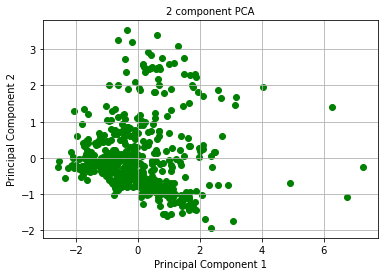

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
fig, ax = plt.subplots()
plt.scatter(finalDf1['principal component 1'],finalDf1['principal component 2'],color ='green') 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 10)
ax.grid()
plt.show()

In [91]:
#Commonality (матрица корреляций)
import numpy as np
C = np.corrcoef(finalDf1['principal component 1'],finalDf1['principal component 2'])
corr = pd.DataFrame(C)
corr

,0,1
0,1.000000e+00,1.834445e-16
1,1.834445e-16,1.000000e+00


In [93]:
#Разница между значениями PCA (velocity) для Альросы
#Убрать NaN значения
delta_PCA = finalDf1.diff()
delta_PCA.fillna(0, inplace=True)
delta_PCA.head(100)

,principal component 1,principal component 2
TIME,,
2015-03-03 10:00:00,0.000000,0.000000
2015-03-03 10:01:00,-2.328214,-0.431115
2015-03-03 10:02:00,-2.208979,1.282282
2015-03-03 10:03:00,-2.149955,0.643318
2015-03-03 10:04:00,1.923928,-1.069258
...,...,...
2015-03-03 11:35:00,-1.113791,0.205756
2015-03-03 11:36:00,3.065855,-1.258730
2015-03-03 11:37:00,-0.712881,0.190663


In [103]:
#Поиск 95% и 5% персентиля для 2-ой бумаги
t1_95 = np.percentile(delta_PCA1['principal component 2'],95)
t1_5 = np.percentile(delta_PCA1['principal component 2'],5)
print('Percentile_95:',t1_95,'Percentile_5:',t1_5)

Percentile_95: 0.8206045833079528 Percentile_5: -0.7389904535014412


<ipython-input-105-da8c17e391df>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])


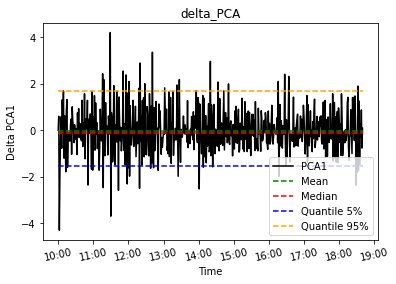

In [105]:
#Визуализация delta_PCA для 1 бумаги - Альроса
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('delta_PCA')
plt.plot(delta_PCA.index, delta_PCA['principal component 1'], color='black', label='PCA1')
plt.plot(delta_PCA.index, [np.mean(delta_PCA['principal component 1']) for i in range(len(delta_PCA['principal component 1']))], label='Mean', color='green', linestyle='--')
plt.plot(delta_PCA.index, [np.median(delta_PCA['principal component 1']) for i in range(len(delta_PCA['principal component 1']))], label='Median', color='red', linestyle='--')
plt.plot(delta_PCA.index, [np.quantile(delta_PCA['principal component 1'], 0.05) for i in range(len(delta_PCA['principal component 1']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(delta_PCA.index, [np.quantile(delta_PCA['principal component 1'], 0.95) for i in range(len(delta_PCA['principal component 1']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='Delta PCA1')
plt.legend(loc = 'best')
plt.xticks(rotation=12)
ax.set_xticklabels(['10:00', '11:00', '12:00', '13:00', '14:00','15:00','16:00','17:00','18:00','19:00'])
plt.show()

In [106]:
#Отобрать значения дельта PCA, где дельта PCA превышает 95% персентиль для Альросы
T = delta_PCA.loc[delta_PCA['principal component 1']>=1.81]
T1 = T[['principal component 1']].reset_index('TIME')
T1

,TIME,principal component 1
0,2015-03-04 11:16:00,2.429713
1,2015-03-04 11:18:00,2.176370
2,2015-03-04 11:29:00,4.202299
3,2015-03-04 11:35:00,1.918973
4,2015-03-04 11:51:00,2.544454
5,2015-03-04 11:56:00,2.378980
6,2015-03-04 12:01:00,2.092834
7,2015-03-04 12:20:00,2.892264
8,2015-03-04 12:28:00,1.999906
9,2015-03-04 12:41:00,3.354152


In [108]:
#Нахождение разницы во времени между моментом события и 100000000
from datetime import timedelta
t= T1['TIME']
time_delta = pd.to_datetime(t, format='%H%M%S%f')- pd.to_datetime(100000000,format = '%H%M%S%f')
event_times = time_delta-timedelta(days=42065)
event_times

0    0 days 01:16:00
1    0 days 01:18:00
2    0 days 01:29:00
3    0 days 01:35:00
4    0 days 01:51:00
5    0 days 01:56:00
6    0 days 02:01:00
7    0 days 02:20:00
8    0 days 02:28:00
9    0 days 02:41:00
10   0 days 03:02:00
11   0 days 03:23:00
12   0 days 03:27:00
13   0 days 04:20:00
14   0 days 04:33:00
15   0 days 04:51:00
16   0 days 06:16:00
17   0 days 06:27:00
18   0 days 06:34:00
19   0 days 08:32:00
Name: TIME, dtype: timedelta64[ns]

In [109]:
#Нахождение моментов времени между 2 событиями и перевод в секунды
consecutive_events = event_times.diff()/np.timedelta64(1,'s')
consecutive_events.dropna

<bound method Series.dropna of 0        NaN
1      120.0
2      660.0
3      360.0
4      960.0
5      300.0
6      300.0
7     1140.0
8      480.0
9      780.0
10    1260.0
11    1260.0
12     240.0
13    3180.0
14     780.0
15    1080.0
16    5100.0
17     660.0
18     420.0
19    7080.0
Name: TIME, dtype: float64>

In [110]:
#Не рассчитывается тестовая статистика!!!
#Anderson-Darling Test - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
#Если шоки независимы и имеют одинаковую интенсивность, то время между событиями распределено экспоненциально. 
#Из результатов функции нужно взять значение статистики, критические значения и сравнить. Если статистика 
#больше критического значения, то гипотеза отвергается и распределение времени не экспоненциальное, а значит 
#шоки зависимы. 
from scipy.stats import anderson
anderson(consecutive_events)
#отвергается гипотеза

AndersonResult(statistic=nan, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [111]:
#Перевести время с момента 100000000 в минуты
times = []
for t in event_times:
    times.append(t.seconds//60)
print(times)
#Нужно преобразование чисел в списке в формат float для расчета параметров процесса Хоукса
new_list = []
for item in times:
    new_list.append(float(item))
new_list

[76, 78, 89, 95, 111, 116, 121, 140, 148, 161, 182, 203, 207, 260, 273, 291, 376, 387, 394, 512]


[76.0,
 78.0,
 89.0,
 95.0,
 111.0,
 116.0,
 121.0,
 140.0,
 148.0,
 161.0,
 182.0,
 203.0,
 207.0,
 260.0,
 273.0,
 291.0,
 376.0,
 387.0,
 394.0,
 512.0]

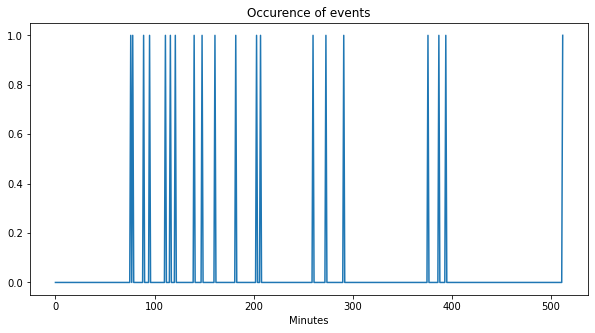

In [112]:
# Время возникновения событий
import numpy as np
import matplotlib.pyplot as plt

bc = np.bincount(np.floor(times).astype(int))

plt.figure(figsize=(10,5))
plt.title("Occurence of events")
plt.xlabel("Minutes")
plt.plot(bc[:530])

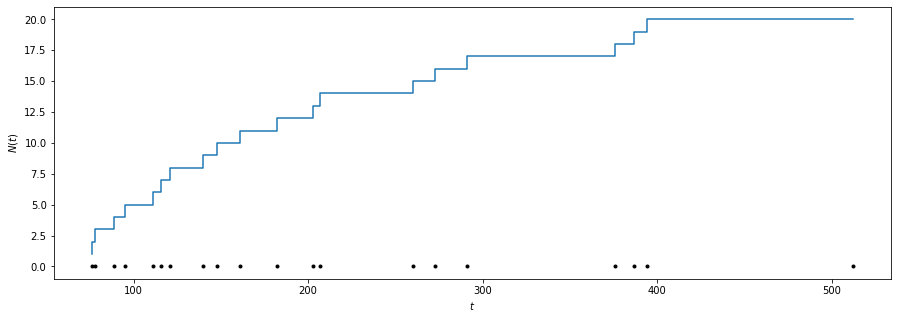

In [113]:
#Counting process N(t)/Процесс счета
ar_pp = sorted(times)
f = plt.figure(figsize=(15,5))

plt.step(ar_pp, np.cumsum(np.ones_like(ar_pp)))
plt.ylabel("$N(t)$")
plt.xlabel('$t$')
_ = plt.plot(ar_pp, np.zeros_like(ar_pp), 'k.')

In [114]:
import Hawkes as hk
import numpy as np
itv = [0,520] # the observation interval
T = np.array(new_list) # sample data
model = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const').set_data({'T':T}, itv)
model.fit(T,itv) # T is the event times (numpy.ndarray)
print("parameter:",model.parameter) # the estimated parameter values
print("branching ratio:",model.br) # the branching ratio
print("log-likelihood:",model.L) # the log-likelihood of the estimated parameter values
print("AIC:",model.AIC) # the AIC of the estimated parameter values

parameter: {'mu': 0.02208579942120507, 'alpha': array([0.18978173, 0.25325416]), 'beta': array([0.03552478, 0.03552364])}
branching ratio: 0.44303588876809463
log-likelihood: -84.16055726956827
AIC: 174.32111453913654


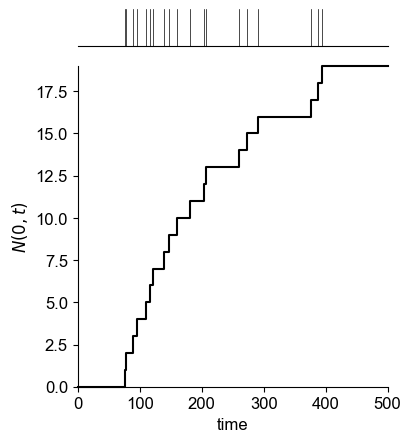

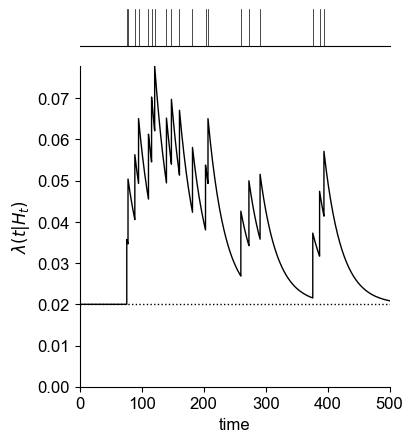

In [116]:
#Здесь задана интенсивность в обычном виде с двойной экспоненциальной функцией 𝜆(𝑡|𝐻𝑡)=𝜇(𝑡)+∑𝑡𝑖<𝑡𝑓(𝑡−𝑡𝑖)
import numpy as np
import Hawkes as hk

para = {"mu":0.02, "alpha":[0.18978173, 0.25325416], "beta":[0.03552478, 0.03552364]}
itv = [0,500]
T = np.array(times)
model = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para).set_data({'T':T}, itv)
model.plot_N() # the figure of N(0,T)
model.plot_l() # the figure of time vs conditional intensity function

In [117]:
[T_trans, itv_trans] = model.t_trans()
time = model.t_trans()
time

[array([ 1.52      ,  1.59038476,  2.08716627,  2.40333901,  3.2734433 ,
         3.56250426,  3.8928971 ,  5.07212981,  5.54683436,  6.32481945,
         7.44171303,  8.42514261,  8.63115259, 10.76647145, 11.26171404,
        12.02034441, 14.56520807, 14.94254024, 15.25252849]),
 [0, 18.393481698670783]]

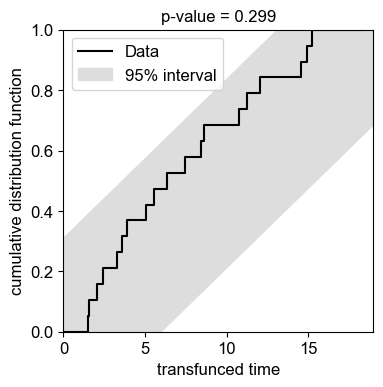

In [118]:
#График для теста Колмогорова-Смирнова
model.plot_KS()